In [5]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori
import pyfpgrowth
import timeit

In [6]:
filtered_uid_songid_file_location = './Dataset/filtered_uid_songid_dataset_freq_11_to_5000.txt'

In [7]:
#Read from filtered_uid_songid_file_location and generate the dataset

filtered_uid_songid_file = open(filtered_uid_songid_file_location)
filtered_uid_songid_file_data = []

for line in filtered_uid_songid_file:
    filtered_uid_songid_file_data.append(ast.literal_eval(line.strip()))
filtered_uid_songid_file.close()

In [8]:
#print(len(filtered_uid_songid_file_data))
# reduced_uid_songid_file_data = filtered_uid_songid_file_data.copy()
# for itemset in reduced_uid_songid_file_data:
#     if(len(itemset)<=10):
#         reduced_uid_songid_file_data.remove(itemset)
#print(len(reduced_uid_songid_file_data))

In [9]:
uid_songid_transaction_data = filtered_uid_songid_file_data
#uid_songid_transaction_data = reduced_uid_songid_file_data[1:5000]
#uid_songid_transaction_data = reduced_uid_songid_file_data[1:5000]
#uid_songid_transaction_data = reduced_uid_songid_file_data
sys.stdout.flush()

In [10]:
# transaction_encoder = TransactionEncoder()
# transaction_encoder_nd_array = transaction_encoder.fit(uid_songid_transaction_data).transform(uid_songid_transaction_data)
# df = pd.DataFrame(transaction_encoder_nd_array, columns=transaction_encoder.columns_)
#df
# from mlxtend.frequent_patterns import apriori
# l = apriori(df, min_support=0.005)

In [11]:
patterns = list(apriori(uid_songid_transaction_data,min_support=0.01,min_confidence=0.02))
len(patterns)

0

In [12]:
sys.stdout.flush()

In [13]:
#Run Apriori for various different Min Sup values

MAX_NUM = 8
MIN_CONF = 0.5
min_sup_array = [0.005*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
num_itemsets_array = []
time_taken_array = []
num_association_rules_array = []
for i in range(len(min_sup_array)):
    print("Computing for min_support= " + str(min_sup_array[i]))
    start = timeit.default_timer()
    patterns = list(apriori(uid_songid_transaction_data,min_support=min_sup_array[i]))
    num_itemsets_array.append(len(patterns))
    stop = timeit.default_timer()
    time_taken_array.append(stop-start)
    rules = list(apriori(uid_songid_transaction_data,min_support=min_sup_array[i],min_confidence=MIN_CONF))
    num_association_rules_array.append(len(rules))


Computing for min_support= 0.005
Computing for min_support= 0.01
Computing for min_support= 0.02
Computing for min_support= 0.04
Computing for min_support= 0.08
Computing for min_support= 0.16
Computing for min_support= 0.32
Computing for min_support= 0.64


In [14]:
num_itemsets_array

[117, 18, 0, 0, 0, 0, 0, 0]

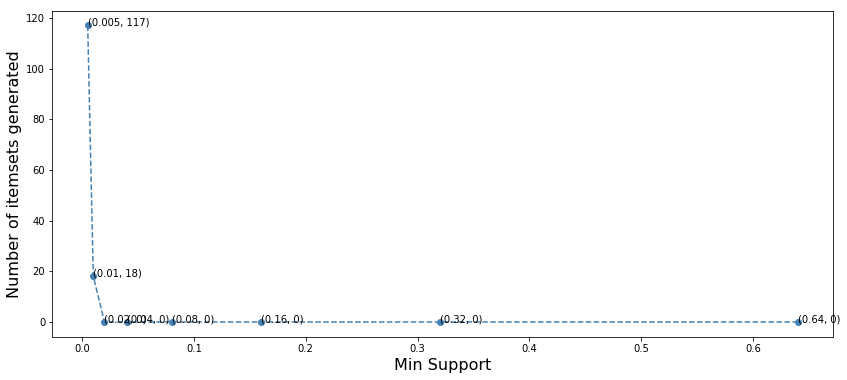

In [15]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_itemsets_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of itemsets generated", fontsize=16)
for i in range(0,len(num_itemsets_array)):
    plt.text(min_sup_array[i], num_itemsets_array[i],'({}, {})'.format(min_sup_array[i], num_itemsets_array[i]))
plt.show()

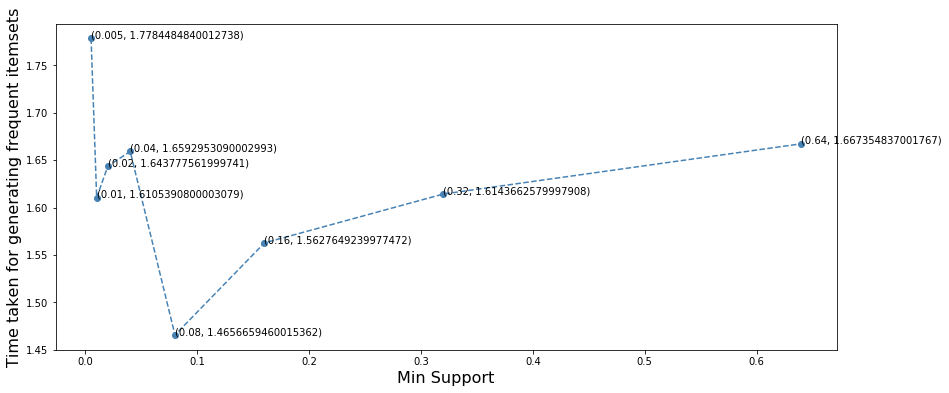

In [16]:
#Plot time taken to find frequent itemsets with respect to MIN_SUP

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Time taken for generating frequent itemsets", fontsize=16)
for i in range(0,len(time_taken_array)):
    plt.text(min_sup_array[i], time_taken_array[i],'({}, {})'.format(min_sup_array[i], time_taken_array[i]))
plt.show()

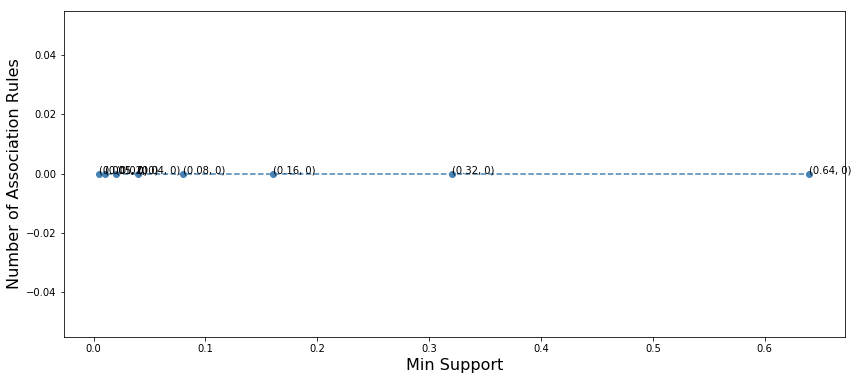

In [17]:
#Plot number of association rules with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(min_sup_array[i], num_association_rules_array[i],'({}, {})'.format(min_sup_array[i], num_association_rules_array[i]))
plt.show()

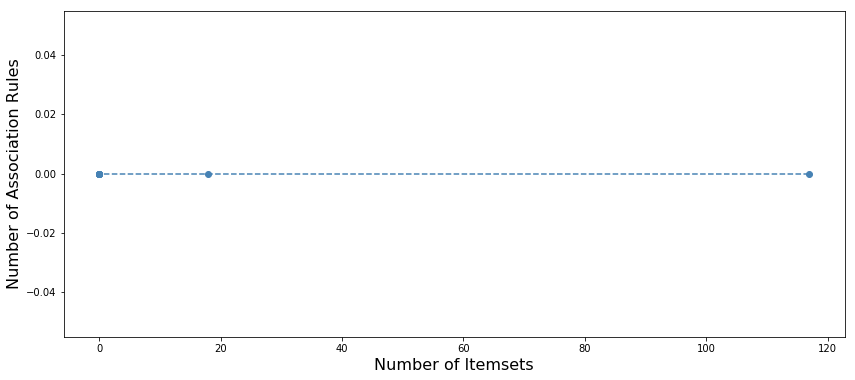

In [18]:
#Plot number of association rules with respect to number of itemsets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(num_itemsets_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Number of Itemsets", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(num_itemsets_array[i], num_association_rules_array[i],'({}, {})'.format(num_itemsets_array[i], num_association_rules_array[i]))
plt.show()

In [19]:
#Run Apriori and generate association rules for various different values of MIN_CONF

MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
MIN_SUP = 0.001
#min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
time_taken_array = []
num_association_rules_array = []
for i in range(len(MIN_CONF_ARRAY)):
    #patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
    start = timeit.default_timer()
    rules = list(apriori(uid_songid_transaction_data,min_support=MIN_SUP,min_confidence=MIN_CONF_ARRAY[i]))
    stop = timeit.default_timer()
    num_association_rules_array.append(len(rules))
    time_taken_array.append(stop-start)

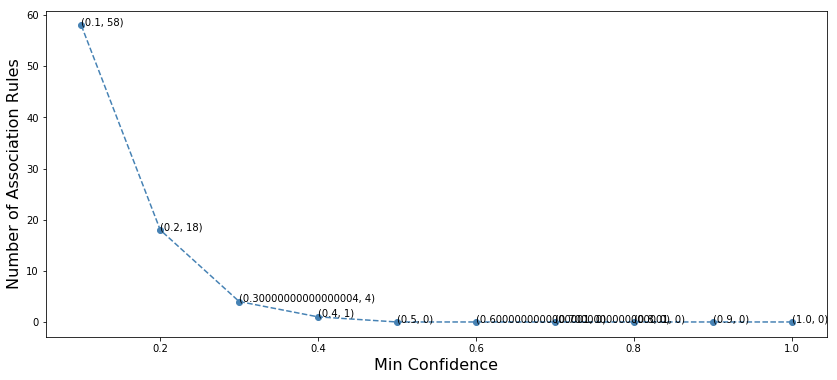

In [20]:
#Plot number of association rules with respect to Confidence Values 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

In [21]:
#Plot time taken to generate association rules with respect to MIN_CONF

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, time_taken_array, color="steelblue",linestyle='--', marker=data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA08AAAF4CAYAAACM3sImAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdd3jV5fnH8fedEJIwAgSIjIBhBFA2hOUAFQO4QK1WqAUUqVqlWmtddRWVulrqwGodWLRU65aKP0AF6wIxIBqxsldC2GEIhJDk/v1xDjFAEk4g4STweV3XuXLO812fAHrlzvN876+5OyIiIiIiIlK6iHAHEBERERERqQpUPImIiIiIiIRAxZOIiIiIiEgIVDyJiIiIiIiEQMWTiIiIiIhICFQ8iYiIiIiIhKDa0byYmTUDXgIaAQXAs+7+uJnFA/8GkoCVwM/dPdvMDHgcOBfYBVzh7vOD5xoJ3BU89QPuPulQ12/QoIEnJSWV6/ckIiIiIiLHjnnz5m1y94bFbbOj+ZwnM2sMNHb3+WZWG5gHXAhcAWxx94fM7HagnrvfZmbnAr8hUDz1Ah53917BYisNSAE8eJ7u7p5d2vVTUlI8LS2tor49ERERERGp4sxsnrunFLftqC7bc/esfTNH7r4D+B/QFBgC7Js5mkSgoCI4/pIHzAHqBguwgcAH7r4lWDB9AAw6it+KiIiIiIgcZ8J2z5OZJQFdgS+BE9w9CwIFFpAQ3K0psKbIYRnBsZLGRUREREREKkRYiiczqwW8CfzW3beXtmsxY17KeHHXutrM0swsbePGjWUPKyIiIiIiQhiKJzOLIlA4TXb3t4LD64PL8fbdF7UhOJ4BNCtyeCKwtpTxg7j7s+6e4u4pDRsWe9+XiIiIiIjIIR3V4inYPe8F4H/uPr7IpinAyOD7kcC7RcZHWEBvYFtwWd90YICZ1TOzesCA4JiIiIiIiEiFOKqtyoFTgeFAupktCI79AXgIeM3MrgJWA5cGt71PoNPeUgKtyq8EcPctZnY/8FVwv/vcfcvR+RZEREREROR4dLS77X3m7ubundy9S/D1vrtvdvf+7p4c/LoluL+7+/Xu3srdO7p7WpFzTXT31sHXi0fz+ygvu3fvpl+/fuTn5wMwadIkkpOTSU5OZtKk4h9b9frrr9O+fXsiIiIIte36qFGjSEhIoEOHDvuNf/PNN/Tp04eOHTtywQUXsH174PazDz74gO7du9OxY0e6d+/OzJkzC4/597//TadOnWjfvj233npr4fiECRN48cUq+dcgIiIiIhKSsHXbE5g4cSIXX3wxkZGRbNmyhbFjx/Lll18yd+5cxo4dS3b2wY+t6tChA2+99RZ9+/YN+TpXXHEF06ZNO2h89OjRPPTQQ6Snp3PRRRfx6KOPAtCgQQP+85//kJ6ezqRJkxg+fDgAmzdv5pZbbuGjjz5i4cKFrF+/no8++ggIFGhPPPHE4fwxiIiIiIhUCSqewmjy5MkMGTIEgOnTp5Oamkp8fDz16tUjNTW12ILnpJNOom3btmW6Tt++fYmPjz9ofNGiRYVFWGpqKm+++SYAXbt2pUmTJgC0b9+enJwc9uzZw/Lly2nTpg37Gm+cffbZhcfUqFGDpKQk5s6dW6ZsIiIiIiJVhYqno2xmeibDn5jJgHvf4evvfmD5jigAMjMzadbspwaCiYmJZGZmVmiWDh06MGXKFCCwHHDNmjUH7fPmm2/StWtXoqOjad26NT/88AMrV64kLy+Pd955Z79jUlJS+PTTTys0s4iIiIhIuKh4Oopmpmfy2NR0NmzbzZ5d24mIrsljU9OZmZ6J+8GPqQo0J6w4EydO5KmnnqJ79+7s2LGD6tWr77d94cKF3Hbbbfz9738HoF69ejz99NNcdtllnH766SQlJVGt2k89RxISEli7ttiO8SIiIiIiVZ6Kp6PoxVmL2LM30BwiMiqagrxc9uzN58VZi0hMTNxvFicjI6Nw6VxFadeuHTNmzGDevHkMGzaMVq1a7Xf9iy66iJdeemm/8QsuuIAvv/yS2bNn07ZtW5KTkwu35eTkEBsbW6GZRURERETCRcXTUbRx2+7C91GxtfCCAvL35rJx224GDhzIjBkzyM7OJjs7mxkzZjBw4MCQz52ZmUn//v3LlGfDhsCziAsKCnjggQe49tprAdi6dSvnnXceDz74IKeeemqxx2RnZ/O3v/2N0aNHF25bvHjxQR39RERERESOFSqejqKGdfaflWnQuitbV39PTPVIqsXU4u6776ZHjx706NGDe+65p7DJw+jRowvbkr/99tskJiYye/ZszjvvvMICKysra78ldEUNGzaMPn36sGhRYIbrhRdeAOCVV16hTZs2tGvXjiZNmnDllVcCgbbjS5cu5f7776dLly506dKlsGi68cYbOfnkkzn11FO5/fbbadOmTeF1Pv/8c84+++xy/BMTEREREak8rLh7bY5VKSkpHuqzkSrCvnue9i3d2561jNVfvEOHn91MjehqPP2r02lUr8ZhnXvChAk0b96cwYMHl2fkkH399deMHz+el19+OSzXFxEREREpD2Y2z91TittW/FSFVIizOjYFAvc+bdy2m9btOnBao71cO/pUPv1hPSfUDcxMLVq7ldaN4oiMCH1icMyYMRWSOVSbNm3i/vvvD2sGEREREZGKpJmnSib7xz2MfHImDeNiueKstpzWrlGFd90TEREREZGA0maedM9TJVO3ZnXuuLgbERHGA2/M58aJX/DNys3hjiUiIiIictxT8VTJmBl92p7AM9f05XcXdGLzjznc9vIcsrJ3hTuaiIiIiMhxTfc8VVKREcbALs04o30TFqzcRONgI4n35q0ipVVDGtU9vMYSIiIiIiJyeDTzVMlFR0XSK/kEALbu3MOzH/yP0X/7L09PX8jWnXvCnE5ERERE5Pih4qkKqVszmheu60f/Tk2Z8tVKrpzwMZM/WUJObl64o4mIiIiIHPNUPFUxDeNiuen8Tvz9mr50bVGf175Yxu7c/HDHEhERERE55umepyqqecPa3PPzFDbvyKFerWjcnUfeWUDvNidw+smNiVB7cxERERGRcqXiqYqrXzsGgG27clmxYQczv1tLm9nLGdW/HV1bNAhzOhERERGRY4eW7R0j6taM5qlfnc7vB3dm665cbv/nl9wx+Us2bc8JdzQRERERkWOCZp6OIZERRmrnRPq1b8x7aav48NtMasdGAbA3v4CoSNXKIiIiIiKHS8XTMah6tUgu7t2Si3q1wMzIzcvn13//lG6tGnD56cnUrRkd7ogiIiIiIlWOpiKOYRZsGrE3r4BOSfV5L201V0yYxT//u5hde9TeXERERESkLFQ8HQdqxkRx43kdefbavqS0asjLnyzhigmzyMreFe5oIiIiIiJVhpbtHUeaNajFXZd054fMbD78NpNGdWMBWLVxB80a1FJ7cxERERGRUqh4Og61a1qPdk3rAYEW57+d+AVN4mswqn87urdsGOZ0IiIiIiKVk5btHedqx0Yx5pz27MjZyx8mz+W2f85h8dqt4Y4lIiIiIlLpqHg6zkWY0b9TIs//uh/XDjiZ5eu2c8MLn5O5ZWe4o4mIiIiIVCpatidAoL35Rb1aMKBLInOXbKBpfE0AZqZn0qVFfeJrxYQ5oYiIiIhIeKl4kv3UjI7izA5NAdi6cw/j//MtERHGz3q34JI+LakZHRXmhCIiIiIi4aFle1KiujWj+fs1femVnMC/Pl3KlRM+5u0vV5Cblx/uaCIiIiIiR91RLZ7MbKKZbTCz74qM/dvMFgRfK81sQXA8ycx2F9n2TJFjuptZupktNbMnzNRju6I0rV+TO3/WjSevOpUWCbV54aMf2LozN9yxRERERESOuqO9bO8fwATgpX0D7n7Zvvdm9hdgW5H9l7l7l2LO8zRwNTAHeB8YBPxfBeSVoDZN6vLQL3uxdssuEurE4u48NW0hvZITSGnVENWvIiIiInKsO6rFk7t/YmZJxW0Lzh79HDirtHOYWWMgzt1nBz+/BFyIiqcKZ2Y0rR9oJLFtVy5pyzbyn7RVdDoxnqv6n0S7pnXDnFBEREREpOJUpnueTgfWu/uSImMtzOxrM/uvmZ0eHGsKZBTZJyM4Viwzu9rM0swsbePGjeWf+jhVt2Y0z/26H9cNas+qjT9y48TPuf/1eWz5MSfc0UREREREKkRl6rY3DHilyOcsoLm7bzaz7sA7ZtYeKG59mJd0Und/FngWICUlpcT9pOyiIiMY0iOJ1E6JvDVnOR+mZxITFfgnVeBOhJbyiYiIiMgxpFIUT2ZWDbgY6L5vzN33AHuC7+eZ2TKgDYGZpsQihycCa49eWjlQjehq/LJfG4ad3prIiAjyCwq44YXPSWnVkJ+f0oqaMWpvLiIiIiJVX2VZtnc28IO7Fy7HM7OGZhYZfN8SSAaWu3sWsMPMegfvkxoBvBuO0LK/yIjAP6dde/JJrF+LVz9fxsgJs3hrznK1NxcRERGRKu9otyp/BZgNtDWzDDO7KrhpKPsv2QPoC3xrZt8AbwDXuvuW4LZfA88DS4FlqFlEpVI7Noo7Lu7KhNGn0aZxHf7+wf+46m//JSt7V7ijiYiIiIgcNnM/fm4DSklJ8bS0tHDHOO58vWITMxas4fdDuhAZYWzYtpuGcTFqby4iIiIilY6ZzXP3lOK2VYp7nuTY1rVFA7q2aADAzpy9XPfcpyQ1rM1V/dtxUmK9MKcTEREREQlNZbnnSY4T0VGRjDyjLRmbd/LbF7/gvtfSWL3px3DHEhERERE5pJCKJzMbYmZXFvl8opnNNrMdZvaGmdWquIhyLKkWGcEFKSfy4pgzGHlGG75esZlrnvmEzM07y3Se3bt3069fP/LzA40oJk2aRHJyMsnJyUyaNKnYY2655RbatWtHp06duOiii9i6deshrzNq1CgSEhLo0KHDQduefPJJ2rZtS/v27bn11lsBWLlyJbGxsXTp0oUuXbpw7bXXFu4/aNAgOnfuTPv27bn22msLs//+979n5syZZfr+RUREROToC+meJzP7Cnjd3R8Jfn4T6Am8BgwHXnL331dk0PKge54qn6079/DZD+s4v/uJAMxZvJ72zeKpHVt6e/OnnnqKvLw8brzxRrZs2UJKSgppaWmYGd27d2fevHnUq7f/ksAZM2Zw1llnUa1aNW677TYAHn744VKv88knn1CrVi1GjBjBd999Vzg+a9Ysxo0bx9SpU4mOjmbDhg0kJCSwcuVKzj///P323Wf79u3ExcXh7lxyySVceumlDB06lFWrVvGrX/2KGTNmhPRnJiIiIiIVp7R7nkJdttcK+DZ4sljgXOB37n4z8AfgovIIKsefujWjCwunbbtyeeCN+VwxYRavz15WanvzyZMnM2TIEACmT59Oamoq8fHx1KtXj9TUVKZNm3bQMQMGDKBatcBtfr179yYjI+OgfQ7Ut29f4uPjDxp/+umnuf3224mOjgYgISHhkOeKi4sDIC8vj9zc3MKGGSeeeCKbN29m3bp1hzyHiIiIiIRPqMVTDLA7+P4UAo0m9v2afBHQpJxzyXGoTo3qPD7qVE5KrMvzH/7AlU99zPQFa8gv2H92NDc3l+XLl5OUlARAZmYmzZo1K9yemJhIZmZmqdeaOHEi55xzzmFnXbx4MZ9++im9evWiX79+fPXVV4XbVqxYQdeuXenXrx+ffvrpfscNHDiQhIQEateuzSWXXFI43q1bNz7//PPDziMiIiIiFS/U4mklcFrw/RBgnrtvC35OALYVd5BIWbVqFMcDw3ryyPDe1K8Vw+NT01m/NfB8qJnpmQx/YiYD7nyV3V6dmemBAqm4paeltUEfN24c1apV4/LLLz/snHl5eWRnZzNnzhweffRRfv7zn+PuNG7cmNWrV/P1118zfvx4fvGLX7B9+/bC46ZPn05WVhZ79uzZ7z6nhIQE1q5de9h5RERERKTihVo8/R34o5mlAdcBLxTZ1gf4vryDyfGtc1J9Hh91Ck9edSpN4msyMz2TP0/5hg3bdhMRFU1u7h4em5rOzPRMEhMTWbNmTeGxGRkZNGlS/GTopEmTeO+995g8efIRPWcqMTGRiy++GDOjZ8+eREREsGnTJqKjo6lfvz4A3bt3p1WrVixevHi/Y2NiYhg8eDDvvvtu4VhOTg6xsbGHnUdEREREKl5IxZO7Pw5cAcwGRrn7c0U21wb+Ue7J5LhnZrRqVAeAFz76oXD5XlRsLbyggF27dvPirEUMHDiQGTNmkJ2dTXZ2NjNmzGDgwIEHnW/atGk8/PDDTJkyhRo1ahSOZ2Zm0r9//zJlu/DCCwtnjhYvXkxubi4NGjRg48aNhV30li9fzpIlS2jZsiU//vgjWVlZQGDW6v3336ddu3aF51u8eHGxHf1EREREpPII+TlP7j7Z3X/j7i8dMH7NgWMi5W3zjpz9Pjdo3ZWtq79n47bdxMfHc/fdd9OjRw969OjBPffcU9jkYfTo0ezrsDhmzBh27NhBamrqfm3Es7KyChtJHGjYsGH06dOHRYsWkZiYyAsvBCZdR40axfLly+nQoQNDhw5l0qRJmBmffPIJnTp1onPnzlxyySU888wzxMfHs3PnTgYPHly4LSEhofD6e/fuZenSpaSkFNvURUREREQqiZBalQNYYI3TBUBfoD7wR3dfZWb9gCXuXulv2FCr8qpr+BMz2bBtd+Hn7VnLWPXFO5x15Z3888ayzRodaMKECTRv3pzBgwcfaczD8vbbbzN//nzuv//+sFxfRERERH5SWqvy4n/dfvAJ6gHvA72A7QSW6j0JrAJ+BWwBbiiXtCLFuPLMtjw2NZ09ewNL4uIat6Jhy86M7JeMu1PgEBlxePcwjRkzpjyjllleXh4333xzWDOIiIiIyKGFumzvUaAZcCrQACj6U+qHwJH96l/kEM7q2JTfnteRhDqxGJBQJ5a/jv09qV2a88bs5dz5r7ls25Ub7piH5dJLL6Vu3brhjiEiIiIihxDSzBOB9uS/d/fZZhZ5wLbVBAorkQp1VsemnNWx6UHjdWpW57vVWxjz/GfcdUk32jZRISIiIiIi5S/UmadaQElPHY1h/5kokaNqQOdm/PXKUzDg5n/M5v++Xh3uSCIiIiJyDAq1eFoEDChhWz8gvXziiBye5MZ1eHL0aXQ8MZ4npqazeuOOcEcSERERkWNMqMv2ngKeMrNtwL+CY3XN7EpgDHB1RYQTKYs6NarzwLCefJ+RTfOGtQHIyc0jpnqo/8xFREREREoW6kNynwPGA2OBpcHhD4BngcfcfXLFxBMpm8gIo2PzwDOevlq6gZETZrFgxaYwpxIRERGRY0HIv5J399vN7GkgFUgANgMfuPvyigonciQa1a1BXGx17pj8JVee1Y5L+7Qk8LgyEREREZGyC/khuccCPST3+LM7N4+/TPmWT/+XxantGnHz4E7UjI4KdywRERERqaQO6yG5Zta8LBdxd7U4k0ontno17vxZV96cU5cXPvqBz39Yx4DO6qwvIiIiImVX2rK9lUBZpqUOfP6TSKVgZlzSpyUprRpyYsNaAGT/uId6taLDnExEREREqpLSiqdRlK14EqnUkhICHfjWbtnJ9c9/xnndmnPlWW2JjAi1Y7+IiIiIHM9KLJ7c/R9HMYfIUdMgLoYzOzTh9dnLWZK1jTsu7krdmpqFEhEREZHS6VfuctypXi2SG87tyM2DO7FwTTbXP/8ZP2RuDXcsEREREankQmpVbmYTD7GLu/tV5ZBH5KgZ0LkZLRLiuP+NeUxfsIZ2TeuGO5KIiIiIVGKhPufpLA6+/ykeqA1sDb5EqpzkxnWYMPo0YqIC/U7Wbd1FfK1oqldT/xMRERER2V9IxZO7JxU3bmZ9gWeAy8sxk8hRFRdbHYC9+QXcOXkusdHVuPuSbpxQt0aYk4mIiIhIZXJE9zy5+yfAX4EnyyeOSPhERUYw+uyTyNyykzHPf8a85RvDHUlEREREKpHyaBixHOgayo5mNtHMNpjZd0XG/mhmmWa2IPg6t8i2O8xsqZktMrOBRcYHBceWmtnt5fA9iADQp+0JTLjqNOJrxXDXv+by78+X4q6O/SIiIiJyhMWTmVUDrgAyQjzkH8CgYsb/6u5dgq/3g+c+GRgKtA8e8zczizSzSOAp4BzgZGBYcF+RctG0fk0eH3UKfU9uwuzF68krUPEkIiIiIqF325tZzHB1oA1QH7g2lPO4+ydmlhRitiHAq+6+B1hhZkuBnsFtS919eTDbq8F9vw/xvCKHFFO9Grdf1IXduflERUawfVcu2Tv3cGLD2uGOJiIiIiJhEurMUwRgB7x2AG8B/d39uSPMMcbMvg0u66sXHGsKrCmyT0ZwrKTxYpnZ1WaWZmZpGzfqHhYJnZlRIzrw+4Wnpy/khhc+55Pvs8KcSkRERETCJdRue2dUYIangfsJtEK/H/gLMIpAgXZQFIov+EpcV+XuzwLPAqSkpGj9lRyWq/qfRNbWXYx7cz4/ZLbgqv7tiIzQM6ZFREREjifl8tOfmXU+3GPdfb2757t7AfAcPy3NywCaFdk1EVhbyrhIhWkQF8OjI/pwQcqJvDlnBbf/80u27twT7lgiIiIichQdacOI7mb2LjD/CM7RuMjHi4B9nfimAEPNLNrMWgDJwFzgKyDZzFqYWXUCTSWmHO71RUIVFRnBmHM68PvBndm8Q4WTiIiIyPGm1GV7ZnYxMBpoDiwFHnD3NDNrQ2B53bnALuChUC5mZq8AZwANzCwDuBc4w8y6EFh6txK4BsDdF5rZawQaQeQB17t7fvA8Y4DpQCQw0d0XluF7FjkiqZ0TObNDE6pFRpBfUMCcxRs4pe0JmBW30lREREREjhVW0jNszOxK4AVgK7CYwFK5OAL3I71IoPB6CnjI3atEJ4aUlBRPS0sLdww5hvzf16t57L10Ujsn8ptzOhAdFRnuSCIiIiJyBMxsnrunFLettJmnMcBMYIi77zSzCOAJ4BVgBXCeuy8u97QiVcjALs3YuC2HyZ8uYcX67dx9aXca1a0R7lgiIiIiUgFKu+epHfC4u+8ECDZ0+FPwmLtUOIlAhBkjzmjD2MtSyMrexZjnP2PByk3hjiUiIiIiFaC04ikWWH/A2L7PyyomjkjV1LvNCTw5+jSaxtekVnRUuOOIiIiISAU4VLe9kp6LlF/eQUSquqbxNXnsylNo3bgOELgf6secvWFOJSIiIiLl5VAPyf2PmeUWM/6+mRX9qdDd/cRyzCVSJe3ruLdm0488+f53vPbFMu69NIWkhNphTiYiIiIiR6q04mnSUUshcoxp1qAWjwzvzbg353PDxM/53QWdOKN9k3DHEhEREZEjUGKr8mORWpXL0bZ5Rw7j3pzPwjXZDDutNVec2TbckURERESkFKW1Kj/UPU8icgTq147h4eG9GdIjSUv3RERERKq4Q93zJCJHKCoygusGtS/8/NG3GTSqV4P2zeLDmEpEREREykrFk8hRlJdfwKufL2Ptlp1cM+BkLkg5sbDJhIiIiIhUblq2J3IUVYuMYPwVp9CtVUOemraQR9/9hpy96vwvIiIiUhWoeBI5ymrHRjH2shSG92vDzPRMbv7HF+TmqYASERERqey0bE8kDCLM+GXfZNo0rsOKDdupXi0y3JFERERE5BDKVDyZWSOgORBz4DZ3/6S8QokcL3omJ9AzOQGA9NVb+HblZoad3poI3QclIiIiUumEVDyZWVPgn0Df4jYDDuhX5yJH4Isf1vHWlytYtHYrt17YhVoxUeGOJCIiIiJFhDrz9DTQAbgVSAf2VFgikePU1akn0aheDf4+43vGPP8Z91zanZYnxIU7loiIiIgEmbsfeiezbOAGd3+54iNVnJSUFE9LSwt3DJFSLVyzhQfemM/OnL08PupUWqiAEhERETlqzGyeu6cUty3UmafdwIbyiyQiJWnfLJ6nfnUa/0lbxYkJtcMdR0RERESCQm1V/hwwvCKDiMhP4mvFMPKMtkSYsWHbbv747zQ278gJdywRERGR41qoM0+ZwHAzmwm8D2w5cAd3n1iewUQkYNXGHcxfsYkxz3/GXZd0o32z+HBHEhERETkuhXrPU8EhdnF3r/Td9nTPk1RVK9Zv57435rF+626uST2JwT2SMLUzFxERESl35XHPU4tyzCMiZdTihDievOo0Hn1nAX+b/j1mxuAeSeGOJSIiInJcCal4cvdVFR1EREpXKyaKey9L4b20VZzdKREAd9cMlIiIiMhREurMEwBm1gHoB8QDm4FP3P27iggmIgeLKDLjlLM3n7tfmcslfVrSK/mE8AYTEREROQ6EVDyZWTXgH8AwoOivud3M/gVc4e755R9PREqyM2cvu/bkcc+rafyybzKX900mQrNQIiIiIhUm1Fbl9wI/B+4hcP9TbPDrPcBlwa8ichTVrx3D+CtOIbVzIv/8ZAn3vvoVO3bvDXcsERERkWNWqMXTL4H73X2cu69y9z3Br+OAB4ARFRdRREoSHRXJzRd04jfndmD+8k2M/883hzxm9+7d9OvXj/z8wGTxpEmTSE5OJjk5mUmTJhV7zN13302nTp3o0qULAwYMYO3atUDgnqsbbriB1q1b06lTJ+bPn194TEnnnTdvHh07dqR169bccMMN7Ov4uWXLFlJTU0lOTiY1NZXs7Gxdo4Rr7PPnP/8ZM2PTpk3F/r0VNWjQIOrWrcv555+/3/jll19O27Zt6dChA6NGjWLv3kAB/vHHH1OnTh26dOlCly5duO+++wqPmTZtGm3btqV169Y89NBDheNDhw5lyZIlh8wiIiJSZbn7IV/AHuDsEradDewJ5TzhfnXv3t1FjlUL12zxzM0/urt7Xn5+iftNmDDBH3vsMXd337x5s7do0cI3b97sW7Zs8RYtWviWLVsOOmbbtm2F7x9//HG/5ppr3N196tSpPmjQIC8oKPDZs2d7z549D3neHj16+BdffOEFBQU+aNAgf//9993d/ZZbbvEHH3zQ3d0ffPBBv/XWW3WNEq7h7r569WofMGCAN2/e3Ddu3Fji3/c+H374oU+ZMsXPO++8/canTp3qBQUFXlBQ4EOHDvW//e1v7u4+a9asg/Z1d8/Ly/OWLVv6smXLfO4xJw8AACAASURBVM+ePd6pUydfuHChu7t//PHHPnr06ENmERERqcyANC+hngh15mktcGoJ204JbheRMDo5sR5N4mvi7jz41tc8Ne079uYf/Ii2yZMnM2TIEACmT59Oamoq8fHx1KtXj9TUVKZNm3bQMXFxcYXvd+7cWdjh791332XEiBGYGb1792br1q1kZWWVeN6srCy2b99Onz59MDNGjBjBO++8U3iukSNHAjBy5Mj9xnWN/a8BcNNNN/HII4+E3G2xf//+1K5d+6Dxc889FzPDzOjZsycZGRmlnmfu3Lm0bt2ali1bUr16dYYOHcq7774LwOmnn86HH35IXl5eSJlERESqmlCLp8nAnWZ2t5m1NLNYM2thZncAdwIvh3ISM5toZhvM7LsiY4+a2Q9m9q2ZvW1mdYPjSWa228wWBF/PFDmmu5mlm9lSM3vC1KtZpFCBQ0KdWKZ8tYpbX5rD5h05hdtyc3NZvnw5SUlJAGRmZtKsWbPC7YmJiWRmZhZ73jvvvJNmzZoxefLkwiVcJR1f2nhiYmKx11u/fj2NGzcGoHHjxmzYsEHXKOEaU6ZMoWnTpnTu3JnysnfvXl5++WUGDRpUODZ79mw6d+7MOeecw8KFC0v9PgAiIiJo3bo133xz6OWjIiIiVVGoxdMfgTeAscAS4EdgKTCuyHgo/gEMOmDsA6CDu3cCFgN3FNm2zN27BF/XFhl/GrgaSA6+DjynyHErMsK4OvVk7ri4K8vXb+f65z7jH7N+YPgTMxlw56vs9urMTA/8sOsH3EMDlDiTMW7cONasWcPll1/OhAkTSj2+rOOl0TX2H9+1axfjxo3b7x6k8nDdddfRt29fTj/9dAC6devGqlWr+Oabb/jNb37DhRdeWOr3sU9CQkLhPXEiIiLHmpCKJ3fPc/dfAB2BMQS6640hUPRc7iG2KXf3T4AtB4zNcPd9azzmAIkHHViEmTUG4tx9dnBN4kvAhaFcX+R4ckb7Jjw+6lQc55XPlrFh224ioqLJzd3DY1PTmZkemNlYs2ZN4TEZGRk0adKk1PP+4he/4M033wQo8fjSxosuCyt6vRNOOIGsrCwAsrKySEhI0DWKucayZctYsWIFnTt3JikpiYyMDLp168a6desO/KsK2dixY9m4cSPjx48vHIuLi6NWrVpAYGnf3r172bRp0yH/zeTk5BAbG3vYWURERCqzUGeeAHD3he7+tAe67j3t7t+Xc55RwP8V+dzCzL42s/+a2enBsaZA0UX5GcExETlAUkJtoiJ/+s88KrYWXlDArl27eXHWIgYOHMiMGTPIzs4mOzubGTNmMHDgwIPOU7SD2pQpU2jXrh0AgwcP5qWXXsLdmTNnDnXq1KFx48Ylnrdx48bUrl2bOXPm4O689NJLhfdfDR48uLDT3KRJk/Yb1zV+ukbHjh3ZsGEDK1euZOXKlSQmJjJ//nwaNWrE3LlzGTGibM1Pn3/+eaZPn84rr7xCRMRP/1bWrVtXOMs0d+5cCgoKqF+/Pj169GDJkiWsWLGC3NxcXn31VQYPHlx43OLFi2nfvn2ZMoiIiFQZJXWSAJoDUUXel/oq6TzFnDcJ+K6Y8TuBtwELfo4G6gffdwfWAHFAD+DDIsedDvynlOtdDaQBac2bNy97uw2RKm7gfe/5gCKvpt1SvfvIB3zgfe+5u/sLL7zgrVq18latWvnEiRMLj7vqqqv8q6++cnf3iy++2Nu3b+8dO3b0888/3zMyMtzdvaCgwK+77jpv2bKld+jQoXD/0s771Vdfefv27b1ly5Z+/fXXe0FBgbu7b9q0yc866yxv3bq1n3XWWb5582Zdo4RrFHXiiScWdtt7/fXX/eqrry7238Fpp53mDRo08JiYGG/atKlPmzbN3d0jIyO9ZcuW3rlzZ+/cubOPHTvW3d2ffPJJP/nkk71Tp07eq1cv//zzzwvPNXXqVE9OTvaWLVv6Aw88UDi+bt0679GjR7HXFxERqSoopdvevkLlIGaWD/Rx97lmVgAUv+NPRVhkKMWamSUB77l7hyJjI4Frgf7uvquE4z4Gfg9kArPcvV1wfBhwhrtfc6hrp6SkeFpaWigxRY4Zw5+YyYZtuws/b89axqov3qH/qLt4+YazwphMytstt9zC8OHD6dSpU1iu/9e//pW4uDiuuuqqsFxfRESkPJjZPHdPKW5btVKOGwUsK/K+1OLpcJnZIOA2oF/RwsnMGgJb3D3fzFoSaAyx3N23mNkOM+sNfEngAb1PVkQ2kWPBlWe25bGp6ezZG7g1Ma5xK+JbdKR9k7hDHClVzaOPPhrW69etW5fhw4eHNYOIiEhFKnHmqUIuZvYKcAbQAFgP3Eugu140sDm42xx3v9bMfgbcB+QB+cC97v6f4HlSCHTuiyVwj9RvPIRvRDNPcryamZ7Ji7MWsXHbbhrGxVCnZnWWZG3n5sGdGNC52aFPICIiInKcKG3mKaTiycxmAte5+w/FbGsDPOPulX79j4onkYDcvHzuf30eZ7RvQv9OpTa4FBERETmuHO6yvaLOINCsoTi1gX6HkUtEwqR6tUjuG9qj8Pk8O/fspWZ0VJhTiYiIiFRuZWlVXtIUVSsCD80VkSpkX+E0b/lGRjwxi4VrthziCBEREZHjW4kzT2Z2JXBl8KMDz5rZjgN2iwU6AB9VTDwRqWitToijbo3q3P3KVzw6ojetGtUJdyQRERGRSqm0macCAo0a8gE74PO+12bgaUB9aUWqqLo1o3nwl72oEV2NOybPJWOzJpJFREREihNqw4hZwK+LaxhRlahhhEjJMjb/yM2TZhMVGcGE0adRt2Z0uCOJiIiIHHVH3DDC3c8s30giUtkk1q/Fn37Ri0++X0tcjerhjiMiIiJS6YTabQ8AM+sMtAViDtzm7i+VVygRCY9WjeJo1SjQWHNd9i5qxkRRO1Zd+EREREQgxOLJzOoCU4He+4aCX4uu+VPxJHKMyM3L59Z/ziG+VjQPXd6LmOpl+j2LiIiIyDEp1FblfwLqA30JFE4XAWcBk4HlQM8KSSciYVG9WiRXn30SizK3Mvb1eeTm5Yc7koiIiEjYhVo8DSRQQM0Jfs5w94/dfQTwIXBjRYQTkfA57aTG3HRBJ+Yv38RDb31NfkFBuCOJiIiIhFWoxVNjYLm75wM5QO0i294CzivvYCISfgM6N+PXA0/m80Xr+ffny8IdR0RERCSsQr2RYR1QN/h+FdAH+Dj4uXU5ZxKRSuTCni2oFRPFKW0bhTuKiIiISFiFWjx9RqBgeg94GbjXzJKAPGAkMKUiwolI5XB2p0QAcnLz+PR/60jtnBjmRCIiIiJHX6jF01igSfD9owSaR1wG1CBQOP2m/KOJSGUzJW0VL3z0A9t25XJJn5bhjiMiIiJyVIX6kNxlwLLg+73AzcGXiBxHfta7JYvXbuO5D/9HzZhqnNO1ebgjiYiIiBw1eniLiIQsMsK47aIu7M7N4/H30qlRvRr92jc59IEiIiIix4ASiyczuwd43t3XBt+Xxt39/vKNJiKVUVRkBHdf2p0/TP6S5z78H73bnEB0VGS4Y4mIiIhUOHP34jeYFQC93X1u8H1p3N0r/U9PKSkpnpaWFu4YIseEnTl72bYrlybxNcMdRURERKTcmNk8d08pbluJM0/uHlHcexERgJoxUdSMicLdeem/izmlbSOSG9cJdywRERGRCqOiSESOyI7de/no20zu/NdcVm/cEe44IiIiIhUmpOLJzM43szElbLvezM4t31giUlXE1ajOg7/sRYQZd0yey7qtu8IdSURERKRChDrzdDdQ0o0NscHtInKcahpfkwcv70nO3nxu/+eXbN6RE+5IIiIiIuUu1OKpHTC/hG0LgJPKJ46IVFUtTojjgWE92LF7L8vXbw93HBEREZFyF+pzniKAWiVsqw1ElU8cEanKTkqsx0u/OZOaMYH/Jbg7ZhbmVCIiIiLlI9SZp2+Ay0vYdjnwbfnEEZGqbl/h9PHCtdz5r7nk5uWHOZGIiIhI+Qi1ePoLcLGZvW5mA8zsZDNLNbPXgYuARysuoohURfn5Bcxbvolxb35NXv6hHhUnIiIiUvmFVDy5+9vAjcBA4P+AdGB68PMN7v5WhSUUkSqpf6dExpzTnjmL1/OXKd9QUMIDuUVERESqilDvecLdnzSzfwCnAvHAJuALd/+xgrKJSBV3QUoSO3PyeHHWImpEV2PMOR10D5SIiIhUWSEXTwDuvgOYVkFZROQYdNmprfgxZy8RKppERESkigu5eDKzxsDNQD8CM0+bgY+B8e6+rkLSiUiVZ2Zc1b9d4YzTjzl7qRWjBp0iIiJS9YR0z5OZtSHwPKcbgB+BucBOAvdBLTCz5FAvaGYTzWyDmX1XZCzezD4wsyXBr/WC42ZmT5jZUjP71sy6FTlmZHD/JWY2MtTri8jRt69wytyyk6v+9jFT560KcyIRERGRsgu1297DwHagjbuf6e7D3P1MoA2wLbg9VP8ABh0wdjvwkbsnAx8FPwOcAyQHX1cDT0Og2ALuBXoBPYF79xVcIlJ5nVAnljZN6vLk+98x67vMcMcRERERKZNQi6czgbvdfWXRQXdfBfwxuD0k7v4JsOWA4SHApOD7ScCFRcZf8oA5QN3g8sGBwAfuvsXds4EPOLggE5FKplpkBHf9rBsdT4znkXe+Yc7i9eGOJCIiIhKyUIun6sCOErbtCG4/Eie4exZA8GtCcLwpsKbIfhnBsZLGD2JmV5tZmpmlbdy48QhjisiRio6K5I+XpdC6URwPvDGfHzKzwx1JREREJCShFk8LgN+Y2X77W+BGhuuC2ytCce25vJTxgwfdn3X3FHdPadiwYbmGE5HDUzM6inG/6Mk53ZqRlBAX7jgiIiIiIQm12959wHvA/8zs30AW0Ai4lMD9SOcdYY71ZtbY3bOCy/I2BMczgGZF9ksE1gbHzzhg/OMjzCAiR1FcjepcP6gDADv37CX7xz0k1q8V5lQiIiIiJQtp5sndpwHnE1iidyfwFHAXgc5757v7jCPMMQXY1zFvJPBukfERwa57vYFtwWV904EBZlYv2ChiQHBMRKqgR95ewC0vzSEre1e4o4iIiIiUKNRle7j7NHdPAWoTmA2q7e493b1MRYuZvQLMBtqaWYaZXQU8BKSa2RIgNfgZ4H1gObAUeI7AEkHcfQtwP/BV8HVfcExEqqArz2rH3vwCbv/nHDZtzwl3HBEREZFimXuxtwod+sBAu/AWwHfuvqdcU1WQlJQUT0tLC3cMESnGorVbue3lOTSMi+XPI/tQp8aR9qERERERKTszmxecNDpIqA/JvcvMHizyuS+wksDDcpeU5SG5IiLFadukLmMv60FW9i4ee+/bcMcREREROUioy/Z+SWD53D6PAN8QeB7TegJL6EREjkjnpPqMvSyFawecHO4oIiIiIgcJtdteU2AJgJk1BHoA/d39YzOrDjxRQflE5DjTvVXgkQIF7vzf/NUM6NKMqMiQb88UERERqTCh/kSSz08Pwu0L5ACfBz9vBOLLOZeIHOe+XbmZJ97/jkffWUB+weHdmykiIiJSnkItnhYCvzSzWsAo4L/uvje4rRk/PZdJRKRcdGnRgNH92/Hf77N48v10Dre5jYiIiEh5KctDct8FLgf2AgOLbDsXmF/OuUREuPSUVvyYs5dXP19GzZgoRvdvh5mFO5aIiIgcp0Iqntx9upmdBHQDFrj7siKbPyHQPEJEpNxdcWZbdu7J4925Kzm3a3Oa1q8Z7kgiIiJynDrs5zxVRXrOk0jVVODO6o0/kpRQO9xRRERE5BhXHs95GmJmVxb5fKKZzTazHWb2RvBeKBGRChFhVlg4zfhmDR9+mxHmRCIiInI8CrVhxF1AwyKfxwOJwLMEuu/9sXxjiYgcrMCdmelr+cuUb/nih3XhjiMiIiLHmVCLp1bAtwBmFkugScTv3P1m4A/ARRUTT0TkJxFm3Pvz7rRpUoc/vfU1X6/YFO5IIiIichwJtXiKAXYH359CoNHEjODnRUCTcs4lIlKs2OrVuH9YDxLr1+SP/07j+4zscEcSERGR40SoxdNK4LTg+yHAPHffFvycAGwr7iARkYoQF1udP13ek/ja0SxcvSXccUREROQ4Eepznv4O/NnMLgK6AL8usq0P8H15BxMRKU18rRieGn06NaID/xtzdz0DSkRERCpUSDNP7v44cAUwGxjl7s8V2Vwb+Ee5JxMROYR9hdMPmVsZ8/xnbNi2+xBHiIiIiBy+UJft4e6T3f037v7SAePXAP8t92QiIiGKjDDWZu/ijslfsnXnnnDHERERkWNUyMXTgcysppldYWazgGXlmElEpEySG9fhvqE92LhtN3f+ay4/5uwNdyQRERE5BpW5eDKzs83sZWA98AKQDDxU3sFERMqiY/N47r60Oys37OCeV78iJzcv3JFERETkGBNSwwgzOwkYAfySQFvyvOCxvwWecveCCksoIhKiHq0TuO2irny8cC0REWoeISIiIuWrxOLJzOKBYcBIoDtgwBzgAQLPeFoGfKPCSUQqk74nN+b0kxphZuzM2UtM9WpEqpASERGRclDazNNaIApYDfwJeMndlwCYWZ2jkE1E5LCYGTl787l50mzaNKnDb8/vRITamIuIiMgRKu2epygCs03bga3AjqOSSESkHMRERXJK20ZMX5DBsx/8D3cPdyQRERGp4kornk4E7gaigUeBNWb2vpkNBWocjXAiIkdieL9kLuyZxNtfrmDyp0vDHUdERESquBKLJ3fPcPdx7t4OOJVAZ73ewGRgMeBA26OSUkTkMJgZ1ww4mdROibz838VM+3p1uCOJiIhIFRZSq3J3n+3u1wKNCDSR+ATIB54xs6Vm9ocKzCgictgizLjpgo78rHcLUlolhDuOiIiIVGFles6Tu+e6+2vufh6QCNwK7ATur4hwIiLlITIigqtTT6ZBXAz5Bc6itVvDHUlERESqoDI/JHcfd9/g7n9x984EWpmLiFR6r3y2lN+9+AVpyzaGO4qIiIhUMYddPBXl7gvK4zwiIhXtwp5JnNiwNve9lsbCNVvCHUdERESqkHIpnkREqopaMVH86fKeNIyL5a5XvmJp1rZwRxIREZEqolIUT2bW1swWFHltN7PfmtkfzSyzyPi5RY65I9isYpGZDQxnfhGpWurWjObBX/aiZnQ17ntjHnvzC8IdSURERKqAauEOAODui4AuAGYWCWQCbwNXAn919z8X3d/MTgaGAu2BJsCHZtbG3fOPanARqbIS6sTy0C97sW1XLlGRleL3SCIiIlLJlfgTg5m9ZWatg+9HmFn9o5SpP7DM3VeVss8Q4FV33+PuK4ClQM+jkk5EjhmJ9WvRvlk8AB99m8GWH3PCnEhEREQqs9J+3ToEiA++fxFoVfFxgMCM0itFPo8xs2/NbKKZ1QuONQXWFNknIzgmIlJmm3fk8MT73/GHyXPZsXtvuOOIiIhIJVVa8bQe6BN8b4BXdBgzqw4MBl4PDj1NoGjrAmQBfymS50DF5jOzq80szczSNm5Ua2IROVj92jHc8/PuZGzeyd2vzmV3bl6x++3evZt+/fqRnx9YITxp0iSSk5NJTk5m0qRJpV7jz3/+M2bGpk2bSt1v1qxZdOnSpfAVExPDO++8A8CKFSvo1asXycnJXHbZZeTm5gLwzDPP0LFjR7p06cJpp53G999/D0B6ejpXXHFFWf4oREREpBSlFU+vAX81s3wChckcM8sv4VX8Txpldw4w393XA7j7enfPd/cC4Dl+WpqXATQrclwisLa4E7r7s+6e4u4pDRs2LKeYInKs6d6yIXdc3JVFmVsZ+9o8cvMOvoVy4sSJXHzxxURGRrJlyxbGjh3Ll19+ydy5cxk7dizZ2dnFnnvNmjV88MEHNG/e/JA5zjzzTBYsWMCCBQuYOXMmNWrUYMCAAQDcdttt3HTTTSxZsoR69erxwgsvAPCLX/yC9PR0FixYwK233srvfvc7ADp27EhGRgarV68+3D8WERERKaK04ukm4DLgPgIzPZOAP5XwerCc8gyjyJI9M2tcZNtFwHfB91OAoWYWbWYtgGRgbjllEJHj1KntGvG7CzqzYMUm0pYePFM9efJkhgwZAsD06dNJTU0lPj6eevXqkZqayrRp04o970033cQjjzyCWXGT5iV74403OOecc6hRowbuzsyZM7nkkksAGDlyZOGMVFxcXOExO3fu3O86F1xwAa+++mqZrisiIiLFK7Hbnrs7weVzZnYF8Li7f1NRQcysBpAKXFNk+BEz60Jg5mvlvm3uvtDMXgO+B/KA69VpT0TKQ2rnRJIb1yEpofZ+47m5uSxfvpykpCQAMjMzadbspwnwxMREMjMzDzrflClTaNq0KZ07dy5zlldffbVwFmnz5s3UrVuXatWqFXu9p556ivHjx5Obm8vMmTMLx1NSUnjooYe49dZby3x9ERER2V9IrcrdvUVFB3H3XUD9A8aGl7L/OGBcRecSkePPvsIpffUW3vhiGcs3bGfNmkx2e3VmpmdyVsemBH6/tL8DZ5Z27drFuHHjmDFjRpkzZGVlkZ6ezsCBgcfYHep6119/Pddffz3/+te/eOCBBwrvwUpISGDt2mJXNYuIiEgZhfxwEzNrbGZ/NrOvzGyZmc01s0fMrFFFBhQRCZc3vljGnCUb2LAth4ioaHJz9/DY1HRmpmeSmJjImjU/Nf3MyMigSZMm+x2/bNkyVqxYQefOnUlKSiIjI4Nu3bqxbt26Q177tdde46KLLiIqKgqABg0asHXrVvLy8kq8HsDQoUMLl/MB5OTkEBsbe1jfv4iIiOwvpOLJzNoA3wA3AD8SuL9oJ3AjsMDMkissoYhImCzfsL3wfVRsLbyggF27dvPirEUMHDiQGTNmkJ2dTXZ2NjNmzCicJdqnY8eObNiwgZUrV7Jy5UoSExOZP38+jRo1Yu7cuYwYMaLEa7/yyisMGzas8LOZceaZZ/LGG28AgU5/++6/WrJkSeF+U6dOJTn5p/8lL168mA4dOhzZH4SIiIgAoc88PQxsA9q4+5nuPszdzwTaBMcfrqiAIiLhsnHb/g/NbdC6K1tXf8/GbbuJj4/n7rvvpkePHvTo0YN77rmH+PjAo/FGjx5NWlpaqedevXp1iTNCK1euZM2aNfTr12+/8Ycffpjx48fTunVrNm/ezFVXXQXAhAkTaN++PV26dGH8+PH7tU2fNWsW5513Xpm/dxERETmYFbeO/qCdzLYC17r7QS2bzGwY8Dd3r3fwkZVLSkqKH+oHGhGRfYY/MZMN23YXft6etYxVX7xD/1F38fINZx3RuW+55RaGDx9Op06djjRmifbs2UO/fv347LPPChtNiIiISOnMbJ67pxS3LdSZp+rAjhK27QhuFxE5plx5ZluioyILP8c1bkVC685c2jup2AYOZfHoo4/+f3v3HR9Vlf5x/POkkQABEiC00BNaAEEDiK7SRBAxKDYsgIqirq6K/qwggro2dG1Y1lVcQATFBmsBkWJBIQQBEZAuJXQCKC31/P6YSQwhZYAkA+H7fr3mlcw959zzzM1NMs/cc84t0cQJPFe3nnnmGSVOIiIixcTX5Gkx8A8zO6K+eZZ6+ru3XESkTOnaqg73XNyKqMphGBBVOYynHrmHKQs28sb05SecQJW02NhYOnfu7O8wREREygxfP458HPgcWGFmHwBbgZrAlXhuUKsB9SJSJnVtVYeurerkPHfOsXn3AT6et570zCz+0aslAcd481sRERE5Nfl6n6dpZtYbeBIYChieG9cuBHo75479JiYiIqcgM+OWC5oTHBjApLlrSc/MYkjv1gQGKIESEREp63weCO+cmwZMM7PyQASwx3tjWxGR04qZcWPXZoQEBTLu21VUDw9lYJem/g5LREREStgxzyL2JkxKmkTktHfd+bFEhpejY5Ma/g5FRERESoGvC0aIiEg+LmpbjyoVypGemcUHc9eQlpHp75BERESkhCh5EhEpBovX72LMrJWM+HAhqelKoERERMoiJU8iIsWgXUwU9/Ruxc9rdzJ80gIOp2X4OyQREREpZkqeRESKyUVt6/F/fc7glw27GTpxAQdTlUCJiIiUJUUmT2YWYmY/m9mFpRGQiMip7ILW0Tx4WVs27vyTbXu1to6IiEhZUuRqe865NDNrCOgjVBERH3SOq027mOpUKBcMQFpGJiFBgX6OSkRERE6Ur8P2ZgC68iQi4qPsxOnjeeu4e8yP7D2Q6ueIRERE5ET5mjy9ClxjZs+b2d/MrLGZNcr9KMkgRUROVQ2qh7N5934eGD+PlP2H/R2OiIiInABzzhVdySwr19N8GzjnTvoxKfHx8S4pKcnfYYjIaWbx77sYPimJ6uGhPNv/bKpVCvV3SCIiIlIAM1vonIvPr6zIOU9eNxZjPCIip5U2Darx1LXteXTiAu4f/xNvDj6fcsEn/edNIiIikodPyZNzbmxJByIiUpa1rBfJ09e35/cdfypxEhEROUX5euUJADMLAFoAVYEk59yBEolKRKQMalYngmZ1IgDPUL6qFUOpW62in6MSERERX/l8k1wzuwPYBvwCzAKaerd/ZmZ3lUx4IiJlT3pmFv/63y/cP24eG3b+6e9wRERExEc+JU9mdgvwMvAZcBVguYq/By4v/tBERMqm4MAAnujXDjO4f9w81m3/w98hiYiIiA98vfJ0L/CCc24w8Gmest/wXoUSERHf1K8ezvMDOhIcFMAD4+exeus+f4ckIiIiRfA1eWoITC+g7ABQpXjCERE5fdSpWoEXBnSkfEgQM5Zs9nc4IiIiUgRfF4zYBTQooKwpkFws0YiInGZqRpTn5ZvOpVL5EAAysxyBAVZEKxEREfEHX688/Q8YbmaNcm1zZlYNGIJnLpSIiByHiIrlCAwwduw7xB3/+Z7F63f5OyQRERHJh6/J0zAgFfgV+AZwwCvACiATeLxExw+brAAAIABJREFUohMROY0EBwaQ5RyPTlpA0tqd/g5HRERE8vApeXLO7QbigaeBYGAtniF/o4GOzjnNdBYROUERFcvxXP+zia5akREfJDFv1XZ/hyQiIiK5+HyfJ+fcn865J5xzf3PONXHOdXTOjXTOFdsau2b2u5ktNbPFZpbk3RZpZjPMbLX3a4R3u5nZK2a2xsx+MbMziysOERF/qVKhHM/270DDqHAen7yQhboCJSIictLwOXkCMLNKZnaOmV1pZh3NrFIJxNTFOdfGORfvff4QMNM5FwvM9D4HuAiI9T4GA2+UQCwiIqWuUlgIz1zfge5nRBNbu7K/wxEREREvn5MnMxsObMJzU9wPgLnAJjMbVkKxZesDjPV+Pxa4NNf2cc5jHlDFzGqVcCwiIqWiQmgwQ3q3plJYCGkZmboCJSIichLwKXkys5HACDxJU3egFXAB8CEw0sxGFFM8DvjazBaa2WDvthrOua0A3q9R3u118CRz2TZ7t+WNfbCZJZlZ0s6devMhIqeeD+euZej7iUxbtNHfoYiIiJzWfL3P0y3AC865+3NtWwbMMrN9eIbNjSiGeM51zm0xsyhghpn9Vkjd/G6E4o7a4NxbwFsA8fHxR5WLiJzsrjynMSuS9/Li50tJz8zikvgG/g5JRETktOTrsL3KwPQCyqZ5y0+Yc26L9+sO4FOgPbA9ezie9+sOb/XNQN1czaOBLcURh4jIyaRccCCPXXUWZzepweivlvHJvHX+DklEROS05GvyNB9oV0BZO2/5CTGzCmYWnv09cCGe+0pNBQZ6qw0Epni/nwoM8K66dzawL3t4n4hIWRMSFMiwK87kvOY1ef+HNew9kOrvkERERE47BQ7bM7PcidVdwKdmlgFMBrYDNYCrgJvwLN5womp4+8iO633n3DQzWwB8aGaDgI3Ald76XwK9gDXAQeDGYohBROSkFRwYwMN927JtzyGqVCiHc56RyN6/myIiIlLCLPuf71EFZlkcOYfIyGdOkXd7lnPO1/lTfhMfH++SkpL8HYaISLF477vVpKVncmPXpkqgREREiomZLcx126QjFJbwPE7+yZKIiPiZc47dfx7my583kp6ZxeDuzZVAiYiIlLACkyfn3IhSjENERI6BmXFXr5YEBwbwyfz1pGdm8feecQQogRIRESkxJ/1QOxERyZ+ZcXuPFgQHBfDRT+vIco67erXyd1giIiJlls/Jk5k1B67Aszx4aJ5i55wbeHQrEREpSWbGzd2aERIUQO2ICv4OR0REpEzzKXkyswHAGDxzoHYAaXmqaG6UiIifmBkDOzfNeb5qy14a1ahEUKCvd6MQERERX/h65elRPPdXGuSc21uC8YiIyAnYvvcg9/73J9rHRvFw37YEK4ESEREpNr7+V60JvK7ESUTk5FajSnkGdWvG3N+28cTkhaRlZPo7JBERkTLD1+RpLtC8JAMREZHicVmHhvyjV0vmr97BiA+SSE1XAiUiIlIcfE2e7gQGm9k1ZlbVzALyPkoySBEROTa9z6rPvZe05ud1u5i2aKO/wxERESkTfJ3ztBlYBLxXQLk7hn2JiEgp6NGmLnWrVaRZnSr+DkVERKRM8DXh+Q9wNfAZ8BtHr7YnIiInoRbREQBs23OQ/3yzgiGXtKZiaLCfoxIRETk1+Zo89QHud869XJLBiIhIydi4az/zVm3noffm89R17akUFuLvkERERE45vs5VOgAsL8lARESk5LSPjeKxq+L5fcefPDBuHnsPpPo7JBERkVOOr8nTu8C1JRmIiIiUrPaxUYzsF8+WlAPcP24eKfsP+zskERGRU4qvw/Y2ANeY2QxgGrAnbwXn3JjiDExERIrfWY2q8+S17Znw3WrKBQX6OxwREZFTijnniq5kllVEFeecO+n/C8fHx7ukpCR/hyEi4nfOOcyMw+mZ/HEwjajKYf4OSURE5KRgZgudc/H5lfl65alhMcYjIiJ+ZmYAPD9lCSu37OXZ6ztQO7KCn6MSERE5ufk058k5t6GoR0kHKiIixa/fuY05nJbB/437iU279vs7HBERkZOarwtGiIhIGRRTqzLP9T+bzCzH/ePm8fuOP/0dkoiIyEnLp+TJzNab2brCHiUdqIiIlIyGNSoxakBHzOCpT34my4e5sCIiIqcjX+c8fQvk/W9aFTgH2A/MKs6gRESkdNWrVpHnB3YkLT2TAO98KBERETmST8mTc+6G/LabWRU8S5d/U4wxiYiIH9TxLhjhnGPCd6s5s3F1WkRH+DkqERGRk8cJzXlyzu0FRgHDiyccERHxt4OpGcz8NZlHJsxn6Ybd/g5HRETkpFEcC0YcBqKLYT8iInISqBAazPMDOlItPJShExewaP0uf4ckIiJyUjju5MnMgsysDTACWFZsEYmIiN9VDQ9l1ICO1KpSnuGTFpC0dqe/QxIREfE7X1fbyzKzzNwPIBVYCMQAQ0oySBERKX0RFcvx3ICzaVA9nAOH0/0djoiIiN/5utre4xy92t5hYAPwlXNuX7FGJSIiJ4XK5UN46aZzCQzwrMCXsv8wkRVD/RyViIiIf/i62t6IEo5DREROUtmJ05LfdzNsYiJDerema6s6fo5KRESk9BXHghEiInIaaFK7Ms3qVOG5zxYzY8lmf4cjIiJS6gq88mRmx7T8uHPu8eMNwszqAuOAmkAW8JZz7mUzGwHcAmTPVH7EOfelt83DwCAgE7jLOTf9ePsXEZGihYUE8cQ17Rn5YRIvTF1CemYWvc6s5++wRERESo05l3cqk7fALMuH9jmNnXOBxx2EWS2glnPuZzMLx7MQxaXAVcB+59zzeeq3ACYC7YHaeG7S28Q5l1lYP/Hx8S4pKel4wxQRESAtI5MnJi8kcc1OXhjYkZb1Iv0dkoiISLExs4XOufj8ygobthdcxKMd8DVgwJoTCdA5t9U597P3+z+BFUBhA+r7AJOcc6nOufXe/tufSAwiIuKbkKBAHr3yLO7p3Yq4uhH+DkdERKTUFJg8Oecy83sAjYD3gPlAC2Cw92uxMLMGQFvv/gHuNLNfzGyMmWX/l64DbMrVbDOFJ1siIlKMQoICuahtPcyMzbv38+n89f4OSUREpMT5vGCEmdU1s7fx3BC3K/B/QKxz7u2ihssdQx8VgY+Be5xzfwBvAI2BNsBW4IXsqvk0z3f8oZkNNrMkM0vauVM3eRQRKW5fLNzIm18vZ9ycVRQ0FPzQoUN06tSJzEzPv4uxY8cSGxtLbGwsY8eOzbfNiBEjqFOnDm3atKFNmzZ8+eWXhcaxadMmunTpQvPmzYmLi+Pll1/OKUtJSaF79+7ExsbSvXt39uzZc0TbBQsWEBgYyEcffQTAzp076dmzp8/HQERETg9FJk9mFmVmLwOrgMvx3POpkXPuJedcWnEFYmbBeBKnCc65TwCcc9u9V7yygP/w19C8zUDdXM2jgS357dc595ZzLt45F1+9evXiCldERLxuvqA5F54RzYTvVzNm1sp8E6gxY8bQt29fAgMDSUlJYeTIkcyfP5/ExERGjhx5VDKTbciQISxevJjFixfTq1evQuMICgrihRdeYMWKFcybN4/XXnuN5cuXA/DMM8/QrVs3Vq9eTbdu3XjmmWdy2mVmZvLggw/So0ePnG3Vq1enVq1azJ0793gOiYiIlFEFJk9mVtnMngLW4lnV7mU8SdOTzrkDxRmEmRnwDrDCOfevXNtr5ap2GfCr9/upQD8zK2dmDYFYILE4YxIREd8EBhhDLmnNxWfV48Mf1/LvGSuOSqAmTJhAnz59AJg+fTrdu3cnMjKSiIgIunfvzrRp0044jlq1anHmmWcCEB4eTvPmzUlOTgZgypQpDBw4EICBAwfy2Wef5bR79dVXufzyy4mKijpif5deeikTJkw44bhERKTsKOwmueuByngWhXgSz7C5iFzzjo7gnFt3AnGcC/QHlprZYu+2R4BrzKwNniF5vwO3evtaZmYfAsuBDOCO4ho6KCIixy7AjH9c1JLgwABWbdlLWkYW5YI9i7CmpaWxbt06GjRoAEBycjJ16/41eCA6Ojonyclr9OjRjBs3jvj4eF544QUiInxboOL3339n0aJFdOjQAYDt27dTq5bn87hatWqxY8eOnFg+/fRTZs2axYIFC47YR3x8PMOGDfP9IIiISJlXWPJUxfu1B3ChD/s67qXKnXM/kP88pgIHuDvn/gn883j7FBGR4mVm3HZhi5zEafqijbz33Wo2bU7mkAth1tJkuraqk++wPs8AhCPdfvvtPProo5gZjz76KPfddx9jxowpMo79+/dz+eWX89JLL1GpUqVC695zzz08++yzBAYe/S8sKiqKLVvyHREuIiKnqcKSpxtLLQoRESkTzIxywYHMWLKJF79YinMQEFyOtLRUXvpiKeC50jRnzpycNps3b6Zz585H7atGjRo5399yyy307t27yP7T09O5/PLLue666+jbt+8R+9q6dSu1atVi69atOUP0kpKS6NevHwC7du3iyy+/JCgoiEsvvZTDhw8TFhZ2PIdBRETKqAKTJ+dc/ssfiYiIFGHct6vJvsAUHFYRl5XFwYOHeHf2b7x8fQ8eeeSRnEUivv76a55++umj9pGd7AB8+umntGzZEvAMtRswYAAzZ848or5zjkGDBtG8eXPuvffeI8oSEhIYO3YsDz30EGPHjs2Zf7V+/V9LrN9www307t2bSy+9FIBVq1bl9CkiIgLHsFS5iIiIr3buO3TE82oxbdm7cTk79h0mMjKSoUOH0q5dO9q1a8fw4cOJjIwE4OabbyYpKQmABx54gFatWtG6dWtmz57Niy++CHiSqqCgoz/7mzt3LuPHj2fWrFlHLW/+0EMPMWPGDGJjY5kxYwYPPfRQka9h9uzZXHzxxSd0HEREpGyxgu7JURbFx8e77H/KIiJScvq/MosduRKoP7auZcOPn9H1xqG8d3c33vtuNd8t30LnuNp0jqtN7cgKPu979OjR1KtXj4SEhJIIPcf555/PlClTfF6kQkREygYzW+ici8+vrLA5TyIiIsflxi5NeemLpaSmexZCrVSrMVExZzCwUywAdatWoGJoMGPnrGLsnFU0qV2Z7q2jSWjXoMh933nnnSUZOuC5Se69996rxElERI6gK08iIlIiZi1N5t3ZK9m57xDVK4dxY5emdG1V54g6O/Yd4tvlW5jz6xaqVQpj5NWeD/p+WLGV1vWrUql8iD9CFxGR01hhV56UPImIyEkhLSOTkKBAduw7RP9XZhEYYJzVqBqd4mpzTtOalC+nwRIiIlLyCkuetGCEiIicFEKCPPdaql4plNdu/ht9OzTk9537GTVlCVf/awYL1uzwc4QiInK608d4IiJyUjEzYmpVJqZWZW7q1owVm/cw+9ctxNaqDMDMXzazaP1uOsXVom3DagQF6nNAEREpHUqeRETkpBVgRlzdSOLqRuZs23swjR9XbmPGL5upXD6E85rXpHPLOrSqF1nInkRERE6ckicRETmlXH52Iy6Jr0/S2p3M+XULM5ZsZvXWP3hl0LkAbN1zkJpVwjAzP0cqIiJljZInERE55YQEBXJO05qc07Qmh9Iy2PXHYQAOHE7nlje+JapyGJ3iatElrjb1qof7OVoRESkrNFBcREROaWEhQdStVhGAwADjjoviqF4plInfr+GWN7/j9re+Z+nGFD9HKSIiZYGuPImISJkRGhLERW3rcVHbeuz+8zDfr9jKnF+3UDksGIBfN6awdts+zm9Rm4iK5fwcrYiInGp0nycRETltvP3NCib/tI4Ag9YNqtIlrjbnNqtFuDe5EhER0U1yvZQ8iYjIhp1/MufXLcxetoWtew5SJ7IC7/y9E2ZGZpYjMEALTYiInM4KS540bE9ERE4r9auHM7BLUwZ0bsLqrfvYcyDVmzhlceNrc2heJ4LOcbU5q3G1nBv3ioiIgJInERE5TZkZTWpXyXl+MDWTsxpV54cVW5mzbAsVQ4M4t1lN+nZoRIMordgnIiJKnkRERAAIDwvm7otbcUfPOBat38XsX7fw/fJtdG1VBwhn656D7DmQSvM6VXQPKRGR05SSJxERkVyCAgNoFxNFu5goUtMzCQr03NVjatLvfDJvPTUqh9Eprjad42rTqEa4EikRkdOIkicREZEClAv+a87T9efH0rhGJeYs28JHP63jwx/X0qxOFV668RwlUCIipwklTyIiIj6oUC6YC1pHc0HraPYdTOP7FVs5cDgDM8M5x1OfLKJJ7cp0alGbqMph/g5XRERKQIC/AxARETnVVC4fQu+z6nP1uY0BOJCawbY9B3n7m9/o/8os7hv7E/9L2sC+g2kn3NehQ4fo1KkTmZmZAIwdO5bY2FhiY2MZO3Zsge1effVVmjZtSlxcHA888EDO9qeffpqYmBiaNm3K9OnTc7ZPmzaNpk2bEhMTwzPPPJOzff369XTo0IHY2Fiuvvpq0tI8ryk1NZWrr76amJgYOnTowO+//37a9zF69GhiYmIwM3bt2lXgzybb4sWL6dixI3FxcbRu3ZoPPvggp8w5x9ChQ2nSpAnNmzfnlVdeAeDzzz/nscceK3LfIlJCnHOnzeOss85yIiIiJWXzrv3uvW9XuZtfn+MufPxzN2vpZuecc/sPpbn9h9KOa5+jR492L730knPOud27d7uGDRu63bt3u5SUFNewYUOXkpJyVJtZs2a5bt26ucOHDzvnnNu+fbtzzrlly5a51q1bu8OHD7t169a5Ro0auYyMDJeRkeEaNWrk1q5d61JTU13r1q3dsmXLnHPOXXnllW7ixInOOeduvfVW9/rrrzvnnHvttdfcrbfe6pxzbuLEie6qq6467fv4+eef3fr16139+vXdzp07i/zZrly50q1atco551xycrKrWbOm27Nnj3POuTFjxrj+/fu7zMzMI36GWVlZrk2bNu7AgQNF7l9Ejg+Q5ArIJ3TlSUREpJjUqVqB686P5a3bzueNwefRsUkNAL74eSNX/+sbHv8wie+WbyU1PdPnfU6YMIE+ffoAMH36dLp3705kZCQRERF0796dadOmHdXmjTfe4KGHHqJcuXIAREVFATBlyhT69etHuXLlaNiwITExMSQmJpKYmEhMTAyNGjUiJCSEfv36MWXKFJxzzJo1iyuuuAKAgQMH8tlnn+Xsa+DAgQBcccUVzJw5E+fcadsHQNu2bWnQoIHPP9smTZoQGxsLQO3atYmKimLnzp05P8Phw4cTEBBwxM/QzOjcuTOff/65z/2ISPFR8iQiIlLMzIxGNSoRGuKZWnxWo+pcfFY9ViTv5Z8f/8zV/5rB81OWkOVcoftJS0tj3bp1OW/Ik5OTqVu3bk55dHQ0ycnJR7VbtWoV33//PR06dKBTp04sWLCg0PYFbd+9ezdVqlQhKCjoqP5ytwkKCqJy5crs3r37tO3jRCUmJpKWlkbjxp6hoGvXruWDDz4gPj6eiy66iNWrV+fUjY+P5/vvvz/hPkXk2Cl5EhERKWGNa1bi9h5xvHd3N569vgOd4mqTnplFgHeVvo/nrWPJ77vJzPIkU7OWJtP/lVlcOHQSh1wIs5Z63py7fJKt/Fb6y8jIYM+ePcybN49Ro0Zx1VVX5Qw5ya/9sW4vLJaTqY+0tDQ+/fRTMjIygL/mi51//vns3bs33z62b99Oly5dmDRpEkOGDKFNmzY5ZZ9++il33nknH3300RFzoDZu3HhC86wSExPp378/7777Ls8++ywxMTHs2bOHDRs2kJSUxC233MJll12W08esWbPYsmXLMfVxLHO5GjVqRKNGjXLm2T3//POEhoYSEhJChw4d8u2jZcuWtG3bljZt2hAfH8/f//73IueLXXnllTnz9/r3758zX6xTp07s2bPnqJ9xXj179qRKlSr07t37iO39+vU7ItksTcczR3HJkiV07NiRVq1acckll/DHH38U2U9B8+78+dpPVN5jV9DPN7fCzvOCnOixU/IkIiJSSgIDjDYNqzGkd2se7tsWgIOpGbz37WoeGD+P/q/MZOj78/nX/35hx75DBASXIy0tlZe+WMqspclER0ezadOmnP1t3ryZ2rVrH9VPdHQ0ffv2xcxo3749AQEB7Nq1q8D2BW2vVq0ae/fuzUk+cveXu01GRgb79u0jMjLypOpjypQptG3blho1apCSksLIkSOZP38+b775JikpKezZs+eoPkJDQ/nll1+47777aNasGX379gXgt99+IzExkQ8++IBWrVrx97//nczMTDZu3MjcuXP56quvWL58ORMnTsxJLh588EGGDBnC6tWriYiI4J133gHgnXfeISIigjVr1nDrrbfSo0cPnnzySSpVqsSkSZNYtmwZDRo0YPr06WRmZpKQkMDy5ctz+pg1a9Yx9TFkyBAefPBBAJYvX57Tx7Rp03JeR2ZmJnfccQdfffUVd999N6mpqaxcuZKUlBRGjBjB6NGj2b59OytWrODVV189qo+AgADCw8NZvHgxN998M+PGjSu0jx9++IGpU6cyduxYEhMTmT17Nh9//DH169fnyiuv5PXXX8/3dyi3+++/n/Hjxx+1/fbbb+e5554rsn1JGDNmDH379iUwMPCIcy4xMZGRI0fmmxTefPPNPPPMMyxdupTLLruMUaNGFdpH7uOYfc4tX74c8O9rP1G5jx0U/PPNraDzvCDFceyUPImIiPhR+XJBTBzSjYf7tqVJrSokrd1FemYWAMFhFXFZWRw8eIhXvlzKjnIN+GTql4z7ehGrN2zh66+/pv25nfhlw25Wb93Hpl372f3nYS7qfQkzZ84EPEP40tLSqFatGgkJCUyaNInU1FTWr1/P6tWrad++Pe3atWP16tWsX7+etLQ0Jk2aREJCAmZGly5d+OijjwDPp+jZ868SEhJyPkn/6KOP6Nq1K2Z2UvUxc+ZM7rrrLsyM2NhYGjVqRGRkJJ9++ilnnnkm06ZNK7CPSy65hPnz53P55Zezfv16VqxYwQ033MC5555LcnIyderUYe7cubz77rs0a9bsiDlQhw4dOmKeVWJiIhs2bDhqnlVaWhrjx48nPT2dK6644oh5VldddRXh4eEkJiby73//m/Dw8Jw+mjdvTnp6eonN5frggw+47rrrmDJlCtOmTSMjI4MbbriBiIgIunbtmnO8cvdRs2ZNFi1ahHOOOXPm0Lhx40L7mD17NmeccQbffvstERERXHzxxTlvYnv27MnEiROL/N3p1q0b4eHhR20/77zz+Oabb3IS8tJ0PHMUV65cyfnnnw9A9+7d+fjjjwvto7B5d/587Scq97GDgn++uRV0nhekOI6d7vMkIiLiZ6EhQXSOq03nuNr0fOILcv/rrxbTlr0blxPYuA3frNxLjbP7cts1F1MtPJSRjw1n3Z4snp86j2WfvUJ0u4uoXCeWrIw6lF/+HS1btiQ102hx6T3c8Z8fCA0JJKLZOdSq35iq4eV57bXXWJG8j2WbUrjurkc5r3M3nMuiz5XX0qRZcwAee/xJBva/nqHDhnFm27YMGjQIgEGDBuUMtYqMjGTSpEkAxMXFcdVVV9GiRQuCgoJ47bXXcj5JHj16ND169CAzM5ObbrqJuLg4AJ599ln69evHsGHDaFtMfWRkZBAQEMCFF14IQNeuXRk/fjwxMTG0bduWbt26kZyczJ133plvHykpKVSvXp2EhASCgoI499xzqV+/PkFBQYwePZprrrmGK6+8kq5du1KhQgUAXnnlFUaNGsW+ffto1aoVaWlpBAUFsXHjRiIjI1myZAnw1zyrDz/8kB9++IGAgABatWrFtm3bGDJkCAAPPfQQEyZM4OqrryY0NJRu3brlnBNbtmyhefPmxz2X6+yzz87ZV+42devWzZlnd/vttzN//nzS0tKoUKFCTh8xMTHMmzfvqD5efvllWrVqRXR0NPv27ePJJ58ssI/stvXq1cvZnrtOlSpVSE1NZffu3VStWrWwX518BQQEEBMTw5IlSzjrrLOOuf3xOt45ii1btmTq1Kn06dOHyZMnH3H1ND/57Xf+/PmA/177icp77HxV0HlerVq1IutDwceuMKd08mRmPYGXgUDgbefcM0U0EREROalVrxzGjn2Hcp7X7dCbDT9+RvMzOzL+rq5kZPbgcPrzhAYHEhQYwJ79qTx7fQcOXTWOQ2kZHErL4GBaBj0e7EWl8iEkrd3JjCWbOezd3qr7dcR0uprnBpxNZMVQ3vt2FeO/Ww1EEXezZzjWWiAtPZPgwADmJWdRrc8IqgEHAoxrX5lDWEgQY//RhcmTJzMlcT2L1u9m8pJ9hK5YSvlyQTQ8/yrWDh0KwG/Je5i3ajthIUHEtDmHmT/+TPlyQVQND815jY0aNSIxMfGoYxEaGsrkyZPzPU5Dhw5lqLePI9rUPYMOd77Jpk2b2T1uGLOWJtO1VR0iIyO57bbbGDZsGABPPPEEZlZgHxMnTuTee+/lvvvuA+COO+7IKevVqxdXXHEFvXr1IisrK2dOz1133UVERASJiYkMHz6cjh07AjB//nwGDhyYs6/sT8avv/56rr/+eho3bsy3337L8OHDqV+/PuBJIC688MKj+ti+fXvOlcTinC/2y++7mLNsS848u+WbUjAzsrKyfOrjjTfeoGrVqvzyyy9ce+21vP3229xzzz1HtMm9r+y2uefs5f4+KiqKLVu2HFfylLt9aSQQs5Ym8+7slWzatDlnjmLXVnV8nqM4ZswY7rrrLh5//HESEhIICQkptL+i9luar/1EFXTsfOXrMfa1fvaxK8wpmzyZWSDwGtAd2AwsMLOpzrnl/o1MRETk+N3YpSkvfbE0ZznzSrUaExVzBgPOjwEgKDCAioF/jbqPqFiOiIrlCtxffOPqxDeuXmD5defHcuU5jb2JVyYHUzM4nJ5BWDnPW4RzmtWkeqVQDqZlcigtg8NpmaSmZxLoXUL7QGoG2/Ye5HC6t21aBsFBgVx7nmcJ7o+uP1z1AAATUklEQVR+Wsf3K7Yd0We18FAm3OO5kvL45IUs25RCWEiQ9xFI3WoVGdK7NQBTEteTsj/VU1bOU169UhhtG3o+WU5OOUCgGaEhgSSu2cHor34lNT3riPli4PmEec6cOTkxbN68mc6dO+d7TDIyMvjkk09YuHBhzrbC5psVNZdr1KhR/PTTT0fN5YqOjvZpLlfuPjZu3Ei3bt2O6iMoKCjf+WK+9LHlUDAz1xxk785t1PMet8++W8y5TWvStGlTDhw4kNPHmjVrqF69+lF9jB07lqCgICIjI+nUqROPP/54oa8jOjqayZMn57zBz/vzOHz4MGFhYfn+fHxxou19NWtpcs7v6/Gec82aNePrr78GPMNsv/jii0L7LGruY2m99hNV2LHzNYEq6Dwvqn624zl2p2zyBLQH1jjn1gGY2SSgD6DkSURETlnZbxrenb2SnfsOUb1yGA8+9n/H9GnssTAzygUHUi44kCoVji5vER1Bi+iIAttfe15sTqKULXvVQIDB3Vv8lZylehKwgFyf9LZtWJXK5UNykrdDaRmkZ/x1heKH37bx68YUcu2SuLoROcnTY5MWsGn3gaPiyj1f7LkpiymXFcw3k6ewPboH7WOj+Prrr3n66ae5YfRsDqVlYJj3eED1Q2tp1qwZ0dHRXPfSTByOfXuj+PG9p1gS0ob20eVYvXo1rducyeA3v+PHhUu57LEJlK9cja9Gv83wUa9hZvztvE50u2UkDc/qyk+TXiSidnNufG02jdv+jbFjx9Kw+RlcM+QZwuu15OY3vmXPgZp8+98nOatnP2KrwIrfVvH2z4fAOX5auJR+T06iYpXqfDtjFp99/CGrt+6jcv2W9LztCWLbX8B3E56nap04ftmwm4SEBF587S3e+zWD1YkzqdKgNf94Zy4padH8/MGz3HvvvUz/aSnzfl5K4HlGWI3GHEzZQvrh/bisTDYtmsWmVsP4blcEmc7oefMwYs7qxJfTZ/DQw48A0Cz+fAY//CzdBtxPZkAI4dWiGfLujzSuHElAQABT56/mrfEfMfvb72m6LB2cY97PS/lt5Wq6dOnCgAEDaXDBTdz26ldM+uR/WNylpOxPJSsri23btpGYnMmw//6HJbM+psfNjwIQEhzIc/09ww7HzVnF1C+XsmzTHu4ZMxeA8LBgnrimPatWrWLR7hA+927PVq1SKMOu8CRso7/6lTVb9x1RXqdqBe7v41lh8fmpS9i8a/8R5Y1qVuKuXq0AeOrjn5m7chsZme6oc+7d2SupWb6653W1vBSASZ/8j9a9bsrZ14Pj55GansnBP/ZQvlIELiuLRR/9i9tuuw2Am1/4jOlvP8nl97+c06ZTXG0uadeOVatXc+Ozk6kYUZ1Jr79Dz8GPcc+YuVzYpi6rVq2iXsPYnGOSW0K7BnRtVYcd+w7x1Mc/H1V+5TmNObdZTTbt2s8LU48evnZ9pybEN67Omq37GP3Vr0eVD7qgOa3qRfLrxhTe/mbFUeV3XNSS2FqVWbhuJy/8b0mBx87Xv3fZcxY7dux4xJzF5ORkBgwYkDP3M1vueZF16tRh0qRJvP/++znlq1atyhlOXJBTOXmqA+QeFLoZ6JC3kpkNBgYD1KtXr3QiExEROQFdW9UpsWSpNAQG5BoGUzmMqMoFf5J7SXyDQvc1akBHnHOkZWTlXPnKbXD3Fuw9mMqhtExen7bsiLLs+WJVG7ehe7tmVBx4B1+/cQ+JQQH8c+RjREZGcnaTGox9YRjnXHQV9WI9b5q+eOvfXHPNNQDEx1QHBzSOwm25iG+eH8yPoSH8+/XXCA4Oom3jKEJvf4Spbz9CVmYW7S/oQ3zbMwB44qmn6JVwOcum/ZfaDZvR+4prCAoO4ZxOA3h15P9xzpmtSA8M4+ohTxFZoxKuxhn8ua4nN13ahQqh5Xh61L9YH1AZ56DPLQ/y1esPkpWVyXX9BxIXF8fvO/6k9w338NHLQ/n58zHUbNCU83pdQUhQAIMGDeJ/X83gm0evJaxiJS77xz+JqBBCRJOm1Eq4jBYtWpDpjItufIA9LoCAQGh28W38PG44GYcPUrVxW6hUm8iqkfztspuYM+FfzH7veaLqxXLLbZ4hjKuW/8KfO5MZ+3A/QstXJPXgH0wceQN1oyK44YYbuO2KC/hz/0HqNj2DimGeq6M9brifS3pfTFZWJu3O68qMd/4JQHRsK94fMZD9+1Jo0aIF4eHhlA8LIe3PXYSGhlHeeyU0OCgw5+f71N3XsXH9GtIPH2LM/11Gr1uGEtX+PLZv305YWBg1atRkT/KRq9tl33sNoFxwYM5+s4XlKg/Npzw0+K/+Q0MCc9785z3ngoLb0CK6Nn+77CY+eHIwAOddNohI7zDEm2++mYDG51OtXlOWLZzFwm88C6Z06t6LG2+8EYDMg3sJDg46IoaQoACCgoJ46aWXufHWO3BZWbTu1Ju6jZoAsH/vbsLCwqhZuxblyx15xRcg2HvVOsDsqNcGf/3uFlQelF0eUHj7oMD8y7M/OAkKCCj02IFnAYfffvuN/fv3Ex0dzTvvvEOPHj0YPnw48fHxJCQkFDgvcuvWrTnz9I6I3ztnMb+5l9nnTa1atY5ql5sVtiLFyczMrgR6OOdu9j7vD7R3zv2joDbx8fEuKSmptEIUERGRUtT/lVlHzBf7Y+taNvz4Gd1uGsb4u7r6MbKTW0ket/vvv5/+/fvTunVrn9vcfffdJCQk0K1bt+Nq/+KLL1KpUqWchUdKUkkeu9GjR1OvXj0SEhJ8blOar/1EnczHzswWOufi86t3Ki9Vvhmom+t5NFD4DC8REREps27s0pRyua4M5J0vJvkryeM2atSoY0p8wLP6XPbqgsfTvkqVKjnLV5e0kjx2d9555zG9+YfSfe0n6lQ9dqfylacgYBXQDUgGFgDXOueWFdRGV55ERETKtuzVu7Lni93YpekpPQSytOi4HT8du+N3sh67wq48nbLJE4CZ9QJewrNU+Rjn3D8Lq6/kSUREREREClNY8nQqLxiBc+5L4Et/xyEiIiIiImXfqTznSUREREREpNQoeRIREREREfGBkicREREREREfKHkSERERERHxgZInERERERERHyh5EhERERER8YGSJxERERERER8oeRIREREREfGBkicREREREREfmHPO3zGUGjPbCWzwdxxywqoBu/wdhJx2dN6JP+i8k9Kmc0784WQ77+o756rnV3BaJU9SNphZknMu3t9xyOlF5534g847KW0658QfTqXzTsP2REREREREfKDkSURERERExAdKnuRU9Ja/A5DTks478Qedd1LadM6JP5wy553mPImIiIiIiPhAV55ERERERER8oORJTlpm1tPMVprZGjN7KJ/ye81suZn9YmYzzay+P+KUsqWo8y5XvSvMzJnZKbE6kJy8fDnnzOwq79+7ZWb2fmnHKGWPD/9j65nZbDNb5P0/28sfcUrZYWZjzGyHmf1aQLmZ2Svec/IXMzuztGP0hZInOSmZWSDwGnAR0AK4xsxa5Km2CIh3zrUGPgKeK90opazx8bzDzMKBu4D5pRuhlDW+nHNmFgs8DJzrnIsD7in1QKVM8fFv3TDgQ+dcW6Af8HrpRill0H+BnoWUXwTEeh+DgTdKIaZjpuRJTlbtgTXOuXXOuTRgEtAndwXn3Gzn3EHv03lAdCnHKGVPkeed1xN4kvXDpRmclEm+nHO3AK855/YAOOd2lHKMUvb4ct45oJL3+8rAllKMT8og59x3QEohVfoA45zHPKCKmdUqneh8p+RJTlZ1gE25nm/2bivIIOCrEo1ITgdFnndm1hao65z7vDQDkzLLl791TYAmZjbXzOaZWWGf3Ir4wpfzbgRwvZltBr4E/lE6oclp7Fjf+/lFkL8DECmA5bMt36Uhzex6IB7oVKIRyemg0PPOzAKAF4EbSisgKfN8+VsXhGcYS2c8V9i/N7OWzrm9JRyblF2+nHfXAP91zr1gZh2B8d7zLqvkw5PTlM/v/fxJV57kZLUZqJvreTT5DBkwswuAoUCCcy61lGKTsquo8y4caAnMMbPfgbOBqVo0Qk6AL3/rNgNTnHPpzrn1wEo8yZTI8fLlvBsEfAjgnPsJCAWqlUp0crry6b2fvyl5kpPVAiDWzBqaWQieyapTc1fwDp/6N57ESXMApDgUet455/Y556o55xo45xrgmWuX4JxL8k+4UgYU+bcO+AzoAmBm1fAM41tXqlFKWePLebcR6AZgZs3xJE87SzVKOd1MBQZ4V907G9jnnNvq76Dy0rA9OSk55zLM7E5gOhAIjHHOLTOzx4Ek59xUYBRQEZhsZgAbnXMJfgtaTnk+nncixcbHc246cKGZLQcygfudc7v9F7Wc6nw87+4D/mNmQ/AMnbrBOXfSDaGSU4eZTcQz/Liady7dY0AwgHPuTTxz63oBa4CDwI3+ibRwpt8DERERERGRomnYnoiIiIiIiA+UPImIiIiIiPhAyZOIiIiIiIgPlDyJiIiIiIj4QMmTiIiIiIiID5Q8iYgIAGZ2g5k576NJPuWdc5VfkGv7f703DS7OWMzMrjOzmWa228zSzWyzmU0ysy7F2Vc+fT9iZhvNLMPMFnu3OTMb4UPbOWY2pyTjExER/1HyJCIief0J9M9n+wBvWV5PAJcVV+dmFgh8CIwFfgcG4blZ54N4btQ508wqF1d/efpuD/wTmAScz1/HoSPwdkn0KSIipw7dJFdERPL6BLjezIZn3xTTzMKAy4GPgRtyV3bOrS3m/h8GrgCucM59nKdsgpldCKQXc5/Zmnu/vumcW5e90Tk3r4T6ExGRU4iuPImISF7jgfrA33JtuwwIxJM8HSHvsD0za+Ad5narmT1uZlvNbK+Z/c/Mogvr2MxCgPuAL/JJnABwzn3tnDuYq831ZrbEzA6b2S4zG29mtfLs93cze8/M+pnZCjM7YGZJZva3XHXmAP/1Pl2be6hefsP2vPv6zcxSzWyZmeV79c3MqpnZG2aW7K37m5kNzlMne8jk2WY2wcz+MLMtZvaKmYXmqVvBzJ4xs7Xe/W0zs4/NrEauOg29+9nprbO4oPhERMR3Sp5ERCSvDcB3HDl0bwDwKbD/GPbzMBAD3ATcjWfo24Qi2sQDVYCpvnTgTULGAyuAvsBDQA/gWzOrmKf6eXgSs0eBq/Ekg5+bWRVv+d+Bp73f96WQoXreOV/vA6u9dUcBLwNN89SrBMwFLgZGeL/+D3jDzP6Rz67HA2u9+3wDuAPPcczeXwgwA7gLT6LXG7gTSAEivHXqAvOBM4AhQALwM/CxmSXk93pERMQ3GrYnIiL5GQe8YGZ34XlTfgFw0THuY4Nz7trsJ2ZWHRhlZrWdc1sKaFM3u21RO/fOjXoCmOOc65dr+2/A93iStldyNakEtHHO7fHW2wYsAHoB7zvnlptZ9lC9Rc653wvpfiTwG9DHOZfl3d8KYB6wMle9u/FcxWvlnFvt3faNN2F7zMzecM5l5Kr/vnPusVz1OgDXANnbrseT1PVxzuVOMD/K9f0IwIBOzrnd3m3TvUnV4/iYmIqIyNF05UlERPIzGSgHXAJcB2wDZh7jPr7I83yp92u9EwstR1MgijxXs5xzP+BJvjrlqf9TduJ0IvF4k7Z2wEfZiZO33/l4FrjIrSeeq0DrzSwo+wFMB6oCLfLUz++Y5Y7vQmBbnsQpr57Al8C+fPo8w3s1TEREjoOuPImIyFGcc3+a2Wd4hu41ACY457LM7Fh2k5Lnear3a2jeirls8n6t78P+I71ft+ZTti1Xeb7xOOdSva+nsHjyUw0IBrbnU5Z3WxSeoYsFLXBRtbAY8RyzcnnqJxcRXxSeYZYDCunzjyL2ISIi+VDyJCIiBRmH50pIAJ6hY6UhCdiL54rXW0XUzU40auZTVtO7r5KwC08yVCOfshocOeRwN7ADz/C9/KwsYHthfbcsos5uPMMWny2gvKAhkyIiUgQN2xMRkYLMwHO/pTedc8tKo0PnXBrwAtDbzC7Pr46ZdTez8ngSj+1Avzzl5+C5cvVtCcWYiWeu1BVmlvN/1Ds/qUGe6tOAZsBG51xSPo/87ptVmK+BmmZ2SSF1pgGtgWUF9JlaSFsRESmErjyJiEi+vElCaV1xyu1pPCvFfWBm/8WzOl0KEI3nXlN9gQjn3EEzGw7828zeA94D6uC5ye1q4N0SjPExPInMZ2b2b6A6nkUktuWp9yKelf2+N7MX8SR8FfAkVOc55/ocY7/vAbcAE83saTzzqcLxrDD4knPuN2A4kAh8Z2aj8czDisBzxaqRc+6mY+xTRES8lDyJiMhJxTmXaWZX4VmoYhCeJbkr4rnK9D2eVeT2eeu+ZWYHgfuBKXiWUv8SeMA5dyzLqh9rjN+Y2XV4Vrb7BFgD3EOe4XnOuX3eK2HDgQfxJHd78SRR+d7Hqoh+0703CX4MGOz9uhvPcugp3jobzSzeG9tTeBK73cCvwNhj7VNERP5i3pvHi4iIiIiISCE050lERERERMQHSp5ERERERER8oORJRERERETEB0qeREREREREfKDkSURERERExAdKnkRERERERHyg5ElERERERMQHSp5ERERERER8oORJRERERETEB/8PQ5m9u4hmQUIAAAAASUVORK5CYII='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(time_taken_array)):
#     plt.text(MIN_CONF_ARRAY[i], time_taken_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], time_taken_array[i]))
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-bf56e0ac08ab>, line 4)

In [22]:
#Run Apriori and generate association rules for various different values of MIN_CONF

MAX_NUM = 8
MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
min_sup_array = [0.005*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
OVERALL_time_taken_array = []
OVERALL_num_association_rules_array = []
for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    time_taken_array = []
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    num_association_rules_array = []
    for j in range(len(MIN_CONF_ARRAY)):
        #patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
        start = timeit.default_timer()
        rules = list(apriori(uid_songid_transaction_data,min_support=min_sup_array[i],min_confidence=MIN_CONF_ARRAY[j]))
        #rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
        stop = timeit.default_timer()
        num_association_rules_array.append(len(rules))
        time_taken_array.append(stop-start)
        
    OVERALL_time_taken_array.append(time_taken_array)
    OVERALL_num_association_rules_array.append(num_association_rules_array)

Calculating for MIN_SUP = 0.005
Calculating for MIN_SUP = 0.01
Calculating for MIN_SUP = 0.02
Calculating for MIN_SUP = 0.04
Calculating for MIN_SUP = 0.08
Calculating for MIN_SUP = 0.16
Calculating for MIN_SUP = 0.32
Calculating for MIN_SUP = 0.64


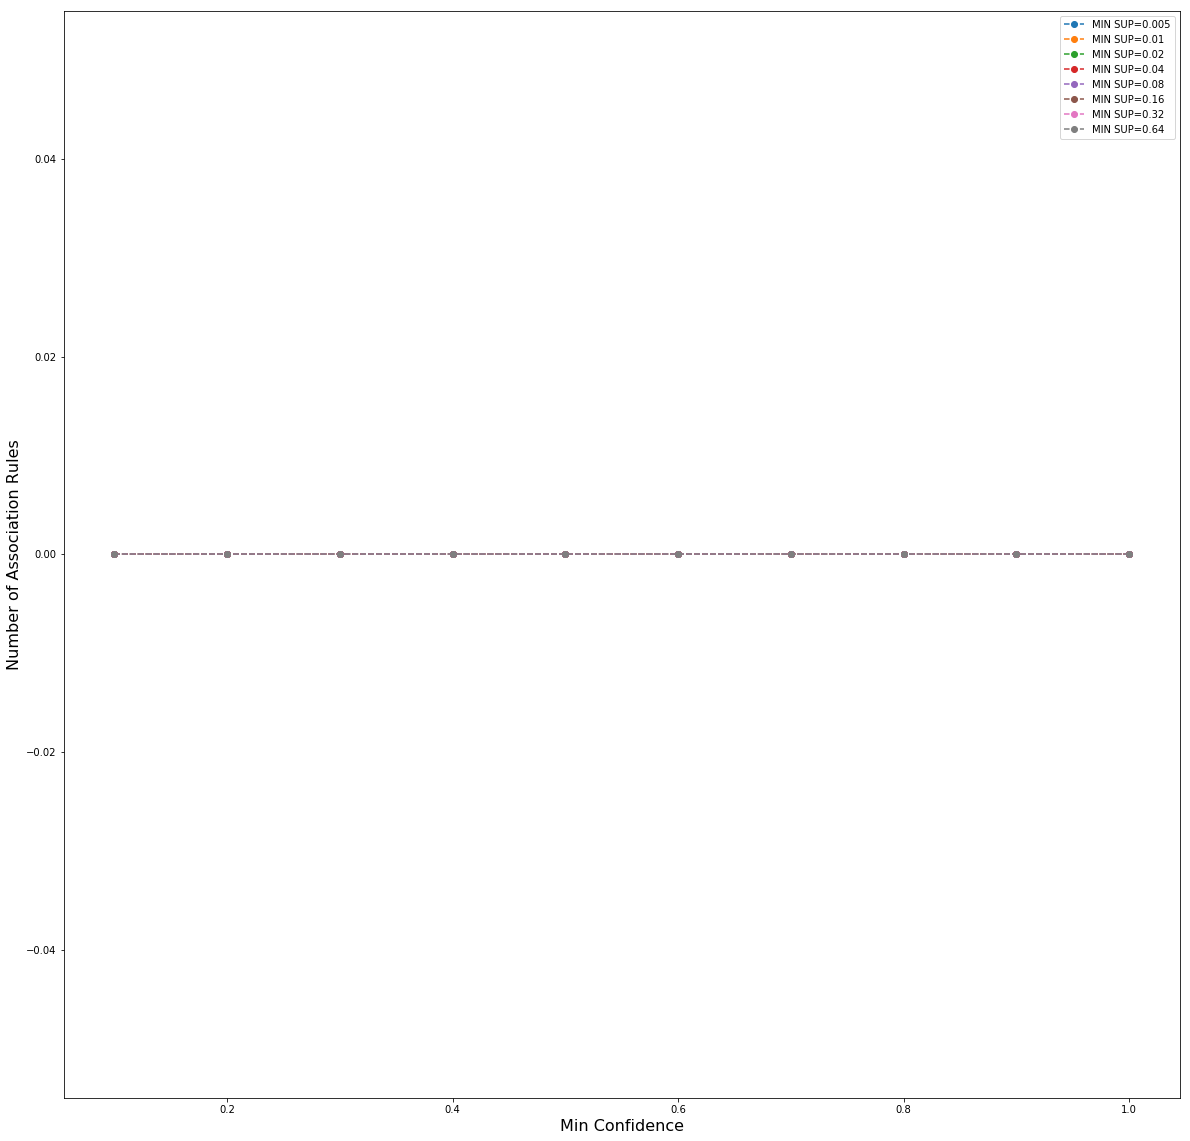

In [23]:
#Plot number of association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_num_association_rules_array[i], linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

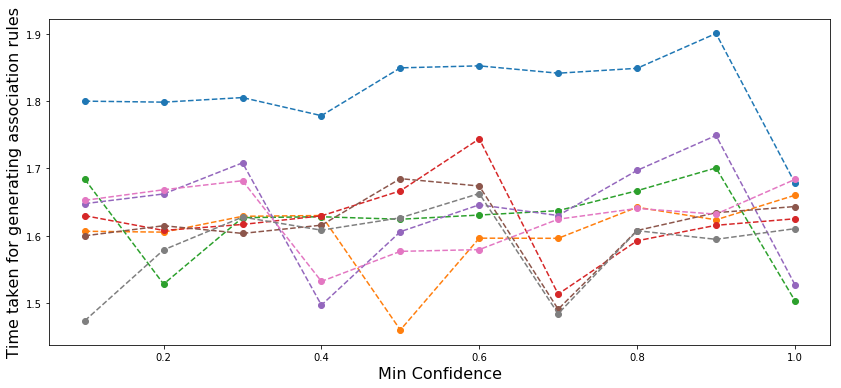

In [24]:
#Plot time taken to generate association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

for i in range(len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_time_taken_array[i],linestyle='--', marker='o')
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()